In [2]:
%reset -f
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import scipy as sp                 # import scipy
import math                        # import basic math functions
import random
import sys
import seaborn as sns  
import pandas  as pd
# sys.path.append('C:\Users\mahal\Thesis_code\oscillations-and-memory')
import gating_variables as gate
import init_regimes as Init

In [3]:
def generateburstsTC(I,T,C_m,dt,regime_name,k):
        
    
        allvariables_TC={}
    
        g_Na_TC, g_K_TC, g_T_TC, g_L_TC, I_bg, g_H, g_KL_TC, V_Na_TC, V_K_TC, V_T_TC, V_L_TC, V_H, V_KL_TC, V_TC, I_K_TC, I_Na_TC, I_L_TC, I_T_TC,I_H_TC, I_KL_TC, n_TC, m_TC, h_TC, m_Ca_TC, h_Ca_TC, S_H_TC, F_H_TC = Init.init_isolated_TC(T, regime_name, k) 

        print(g_L_TC)
        print(g_H)
        I=I

        for i in range(len(T)-1):

            I_K_TC[i]= g_K_TC*np.power(n_TC[i],4)*(V_TC[i]-V_K_TC)/C_m

            I_Na_TC[i]=g_Na_TC*np.power(m_TC[i],3)*h_TC[i]*(V_TC[i]-V_Na_TC)/C_m

            I_L_TC[i]=g_L_TC*(V_TC[i]-V_L_TC)/C_m

            I_KL_TC[i]=g_KL_TC*(V_TC[i]-V_KL_TC)/C_m

            I_T_TC[i]=g_T_TC*np.power(m_Ca_TC[i],2)*h_Ca_TC[i]*(V_TC[i]-V_T_TC)/C_m

            I_H_TC[i]=g_H*S_H_TC[i]*F_H_TC[i]*(V_TC[i]-V_H)/C_m
    

            V_TC[i+1]=(I[i]/C_m-I_K_TC[i]-I_L_TC[i]-I_T_TC[i]-I_Na_TC[i]-I_H_TC[i]-I_KL_TC[i])*dt+V_TC[i]              
                   
    
     
            n_TC[i+1]=-(n_TC[i]-gate.n_inf(V_TC[i]))*dt/gate.tau_n(V_TC[i]) +n_TC[i]

            m_TC[i+1]=-(m_TC[i]-gate.m_inf(V_TC[i]))*dt/gate.tau_m(V_TC[i]) +m_TC[i]

            h_TC[i+1]=-(h_TC[i]-gate.h_inf(V_TC[i]))*dt/gate.tau_h(V_TC[i]) +h_TC[i]

            m_Ca_TC[i+1]= gate.m_Ca_TC_inf(V_TC[i+1])

            h_Ca_TC[i+1]=-(h_Ca_TC[i]-gate.h_Ca_TC_inf(V_TC[i]))*dt/gate.tau_Ca_TC_h(V_TC[i]) +h_Ca_TC[i]

            S_H_TC[i+1]= -(S_H_TC[i]-gate.H_TC_inf(V_TC[i]))*dt/gate.tau_H_S(V_TC[i]) + S_H_TC[i]

            F_H_TC[i+1]= -(F_H_TC[i]-gate.H_TC_inf(V_TC[i]))*dt/gate.tau_H_F(V_TC[i]) + F_H_TC[i]
            
        allvariables_TC = {'Injected current (μA)': I, 'n_K':n_TC, 'h_Na':h_TC, 'm_Na':m_TC, 'I_T (nA)':I_T_TC, 'm_Ca_TC': m_Ca_TC, 'h_Ca_TC':h_Ca_TC,'I_h (nA)':I_H_TC, 'slow state variable': S_H_TC, 'fast state variable':F_H_TC, 'Membrane potential (mV)':V_TC}
        
        return allvariables_TC



In [4]:
def generatespikes(V_pre,V_th,T,dt):

    spike=[]
    print(np.dtype(spike))
    # spike_train=[]
    spike_train=np.zeros(len(T))
    k=0
    count=0
    for i in range(len(T)-1):
        if V_pre[i]>=V_th:
            
    #         print(V_TC[i+1], i+1)
            spike= np.append(spike,(i)*dt)
            spike_train[i]=1
            k=k+500
            count+=1
            # print(i)
            # if k==len(T):
            #     StopIteration
        k+=1
        
    return spike_train, spike

In [5]:
def generatespikes(V_pre,V_th,T,dt):

    spike=[]
    print(np.dtype(spike))
    # spike_train=[]
    spike_train=np.zeros(len(T))
    i=0
    count=0
    while i < len(T):
        if V_pre[i]>=V_th:
            
    #         print(V_TC[i+1], i+1)
            spike= np.append(spike,(i)*dt)
            spike_train[i]=1
            i=i+200
            count+=1
            # print(i)
            # if k==len(T):
            #     StopIteration
        i+=1
        
    return spike_train, spike

In [6]:
def duration_of_sim (t_start, t_end, dt):
   '''
   input parameters: 
      other parameters: time step for simulation , dt : 0.001 (change the dt value as per choice)
      C_m: capacitance per unit area, important to divie the current by capacitance per unit area to get the

   '''
   T = np.arange(t_start, t_end+dt, dt)
   return T
# capacitance per unit area of neuron (microF/cm^2)
C_m=1 


In [7]:
def inputcurrent(i_mean,u,sigma,t_end,dt):
    # for t =t_max
    
    i=i_mean*(1+sigma*math.sqrt(t_end/dt)*(2*u-1))
    return i

In [8]:
def inputcurrentnoise(i_mean,sigma,dt,tau,T):
    # for t =t_max
    i=np.zeros(len(T))
    for n in range(len(T)-1):
        u=np.random.random()
        i[n+1]=(-i[n]+sigma*math.sqrt(tau)*(u)+i[n])*dt/tau
    return i

## Experiment misc - effect of amplitude of external hyperpolarising pulse on burst latency

In [8]:

T= duration_of_sim(0, 500, dt=0.01)

I_TCinput1= 0*np.ones(len(T))
I_TCinput2= 0*np.ones(len(T))
I_TCinput3= 0*np.ones(len(T))

I_TCinput1[10000:12000]= -1.5
I_TCinput2[10000:12000]= -2
I_TCinput3[10000:12000]= -2.5
# I_TRNinput[140001:160000]= 1.5
# I_TRNinput[320001:340000]= -0.5
# # I_TRNinput[700000:720000]=-3.5
# I_TRNinput[720001:740000]=-0.5
# for k in range(5):

allvariables_TC_test0=generateburstsTC(I_TCinput1,T,C_m, dt=0.01, regime_name="test leaky",k=0)
allvariables_TC_test1=generateburstsTC(I_TCinput2,T,C_m, dt=0.01, regime_name="test leaky",k=0)
allvariables_TC_test2=generateburstsTC(I_TCinput3,T,C_m, dt=0.01, regime_name="test leaky",k=0)
# allvariables_TC_test3=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test leaky",k=3)
# # allvariables_TC_test4=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test leaky",k=4)
# allvariables_TC_test5=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test leaky",k=5)

0.01
0.015
0.01
0.015
0.01
0.015


Text(0, 0.5, 'Membrane potential (mV)')

<Figure size 640x480 with 0 Axes>

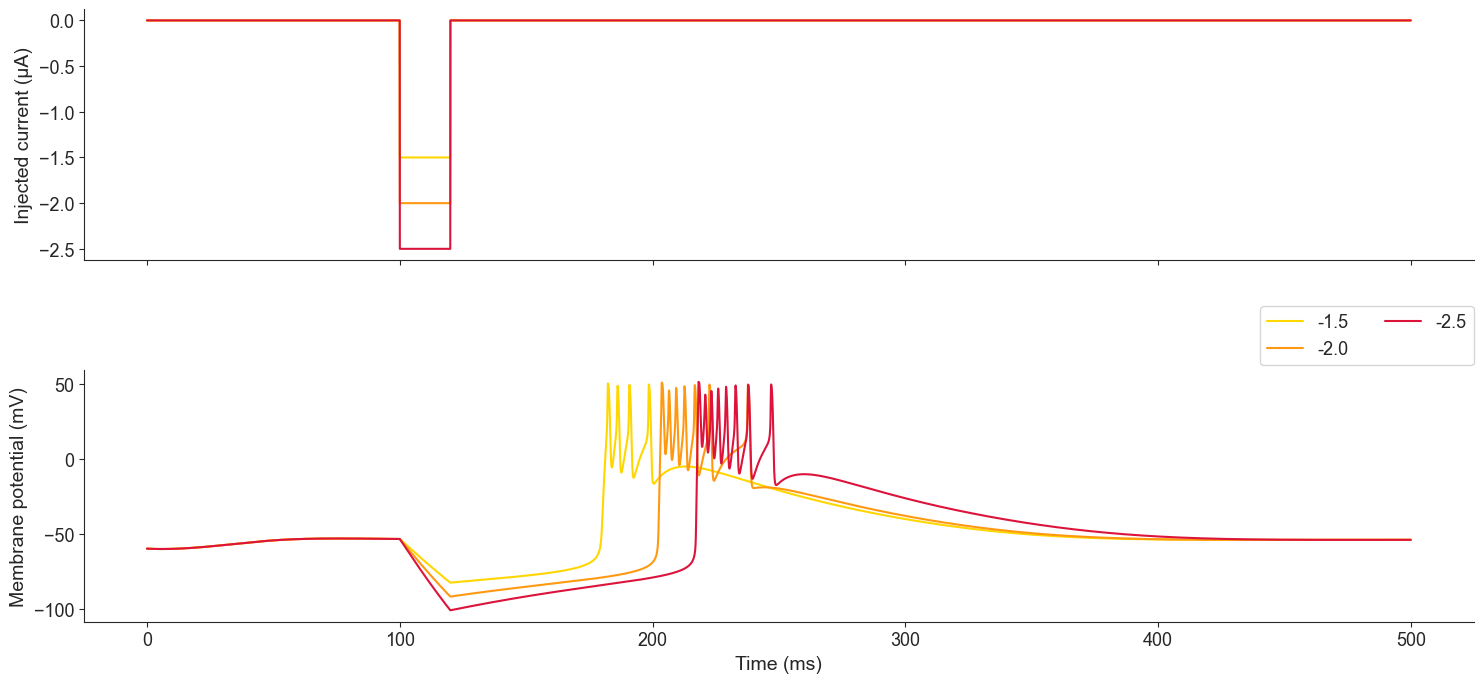

In [9]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(15,7), tight_layout=True) #7,5 is better for shorter plots


V_TC0= allvariables_TC_test0['Membrane potential (mV)']
I0=allvariables_TC_test0['Injected current (μA)']

V_TC1= allvariables_TC_test1['Membrane potential (mV)']
I1=allvariables_TC_test1['Injected current (μA)']

V_TC2= allvariables_TC_test2['Membrane potential (mV)']
I2=allvariables_TC_test2['Injected current (μA)']

# V_TC3= allvariables_TC_test3['Membrane potential (mV)']
# I3=allvariables_TC_test3['Injected current (μA)']

# # V_TC4= allvariables_TC_test4['Membrane potential (mV)']
# # I4=allvariables_TC_test4['Injected current (μA)']

# V_TC5= allvariables_TC_test5['Membrane potential (mV)']
# I5=allvariables_TC_test5['Injected current (μA)']

plt.subplot(2,1,1)
plt.plot(T,I0, label='-1.5', color='#FFD700')
plt.plot(T,I1,label='-2.0', color='#FF9912')
plt.plot(T,I2,label='-2.5',color='#DC143C')
# plt.title('gLmax value affects the frequency of bursts in TRN')
# # plt.box(on=None) : removes the entire box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('Injected current (μA)')
# plt.xlim(90, 250)
plt.subplot(2,1,2)
plt.plot(T,V_TC0, label='-1.5', color='#FFD700')
plt.plot(T,V_TC1,label='-2.0', color='#FF9912')
plt.plot(T,V_TC2,label='-2.5',color='#DC143C')
# plt.plot(T,V_TC3,label='0.07', color='#8B1A1A')
# # plt.plot(T,V_TC4,label='0.09',color='#8B4500')
# plt.plot(T,V_TC5,label='0.1', color='black')
# plt.title('gLmax value affects the frequency of bursts in TRN')
# label ='RMP= -50 mV, V_init=-50'
# plt.xlim(90, 250)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.legend()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,
           ncol=2, borderaxespad=0.)

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
# plt.savefig('-ve input Regime 1 gLmaxTRN 0.09, V_L -77mV white.pdf', bbox_inches = 'tight')
# plt.savefig('2. zoom effects of gLmax on the frequency of bursts in TC with current trigger.pdf')

In [10]:
## mels analysis on pulse amplitude with pulse train instead of single pulse

## Experiment 1 - Does the maximal conductance of leaky channel affect the frequency of bursting in TC?

In [11]:

T= duration_of_sim(0, 2000, dt=0.01)

I_TCinput= 0*np.ones(len(T))
I_TCinput[10000:12000]= -2
I_TCinput[24000:26000]= -2
# I_TRNinput[140001:160000]= 1.5
# I_TRNinput[320001:340000]= -0.5
# # I_TRNinput[700000:720000]=-3.5
# I_TRNinput[720001:740000]=-0.5
# for k in range(5):

allvariables_TC_test0=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test leaky",k=0)
allvariables_TC_test1=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test leaky",k=1)
allvariables_TC_test2=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test leaky",k=2)
# allvariables_TC_test3=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test leaky",k=3)
# # allvariables_TC_test4=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test leaky",k=4)
# allvariables_TC_test5=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test leaky",k=5)

0.01
0.015
0.03
0.015
0.05
0.015


Text(0, 0.5, 'Membrane potential (mV)')

<Figure size 640x480 with 0 Axes>

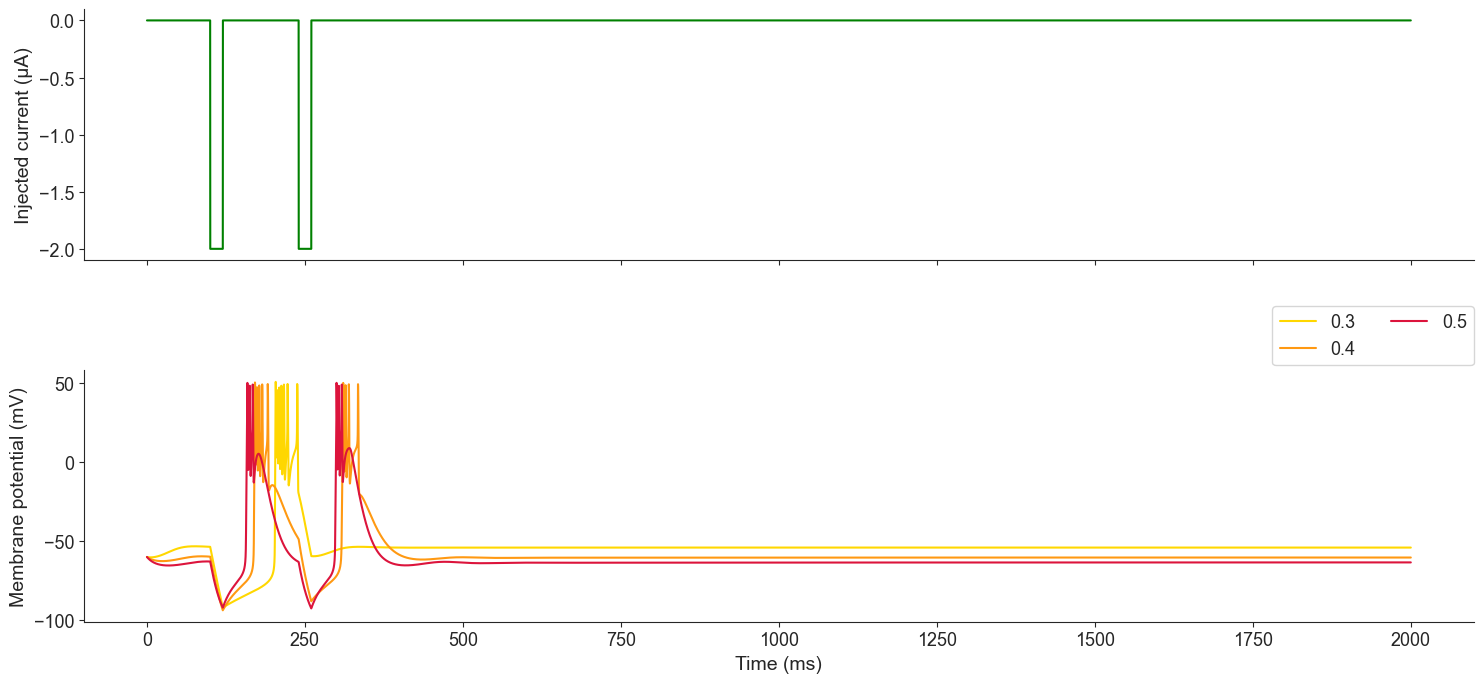

In [12]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(15,7), tight_layout=True) #7,5 is better for shorter plots


V_TC0= allvariables_TC_test0['Membrane potential (mV)']
I0=allvariables_TC_test0['Injected current (μA)']

V_TC1= allvariables_TC_test1['Membrane potential (mV)']
I1=allvariables_TC_test1['Injected current (μA)']

V_TC2= allvariables_TC_test2['Membrane potential (mV)']
I2=allvariables_TC_test2['Injected current (μA)']

# V_TC3= allvariables_TC_test3['Membrane potential (mV)']
# I3=allvariables_TC_test3['Injected current (μA)']

# # V_TC4= allvariables_TC_test4['Membrane potential (mV)']
# # I4=allvariables_TC_test4['Injected current (μA)']

# V_TC5= allvariables_TC_test5['Membrane potential (mV)']
# I5=allvariables_TC_test5['Injected current (μA)']

plt.subplot(2,1,1)
plt.plot(T,I2, color= 'green')
# plt.title('gLmax value affects the frequency of bursts in TRN')
# # plt.box(on=None) : removes the entire box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('Injected current (μA)')
# plt.xlim(90, 250)
plt.subplot(2,1,2)
plt.plot(T,V_TC0, label='0.3', color='#FFD700')
plt.plot(T,V_TC1,label='0.4', color='#FF9912')
plt.plot(T,V_TC2,label='0.5',color='#DC143C')
# plt.plot(T,V_TC3,label='0.07', color='#8B1A1A')
# # plt.plot(T,V_TC4,label='0.09',color='#8B4500')
# plt.plot(T,V_TC5,label='0.1', color='black')
# plt.title('gLmax value affects the frequency of bursts in TRN')
# label ='RMP= -50 mV, V_init=-50'
# plt.xlim(90, 250)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.legend()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,
           ncol=2, borderaxespad=0.)

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
# plt.savefig('-ve input Regime 1 gLmaxTRN 0.09, V_L -77mV white.pdf', bbox_inches = 'tight')
# plt.savefig('2. zoom effects of gLmax on the frequency of bursts in TC with current trigger.pdf')

### Analyse the spiking behavior to the change in maximal conductance

[]
[]
[]


(0.0, 500.0)

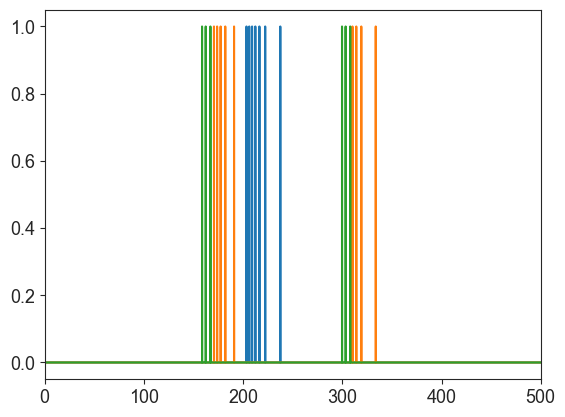

In [13]:
spike_train0, spike_time0= generatespikes(V_pre=V_TC0, V_th=25, T =T, dt=0.01)

spike_train1, spike_time1= generatespikes(V_pre=V_TC1, V_th=25, T =T, dt=0.01)

spike_train2, spike_time2= generatespikes(V_pre=V_TC2, V_th=25, T =T, dt=0.01)


# HERE 120 is the initial stimulus time
lat0=int(spike_time0[0]-120)
lat1=int(spike_time1[0]-120)
lat2=int(spike_time2[0]-120)
lat3=int(spike_time0[5]-260)
lat4=int(spike_time1[3]-260)
lat5=int(spike_time2[2]-260)

isiL_0=[]
isiL_1=[]
isiL_2=[]
isiL_0=np.diff(spike_time0)
id0=np.where(isiL_0<50)
isiL_0=isiL_0[id0]

isiL_1=np.diff(spike_time1)
id1=np.where(isiL_1<50)
isiL_1=isiL_1[id1]

isiL_2=np.diff(spike_time2)
id2=np.where(isiL_2<50)
isiL_2=isiL_2[id2]

plt.plot(T,spike_train0)
plt.plot(T,spike_train1)
plt.plot(T,spike_train2)
plt.xlim(0,500)

In [14]:
lat= [lat0, lat1, lat2, lat3, lat4, lat5]
lat

[83, 50, 38, -37, -78, -92]

In [15]:
isiL_values= np.append(isiL_0, isiL_1)
isiL_values=np.append(isiL_values, isiL_2)
isiL_values

tagL1=['0.03']
tagL2=['0.06']
tagL3=['0.09']
isiL_tags=[]
tags=[]
tags=np.append(tagL1,tagL2)
tags=np.append(tags, tagL3)
tags

lat_tags=[]
lats=[]
lats=np.append(lat0,lat1)
lats=np.append(lats, lat2)

l1=[len(isiL_0), len(isiL_1), len(isiL_2)]
# print(len(isi_0))
for j in range(len(tags)):
        for i in range(l1[j]):
                isiL_tags+= [tags[j]]
                lat_tags+=[lats[j]]
        
isiL_tags
lat_tags




[83, 83, 83, 83, 83, 83, 50, 50, 50, 50, 50, 50, 50, 38, 38, 38, 38]

In [16]:
inter_spike_interval_gLmax= {'Inter spike interval (ms)':isiL_values, 'gLmax (mS/cm2)': isiL_tags,'Burst latency (ms)': lat_tags }
data_L= pd.DataFrame(inter_spike_interval_gLmax, columns= ['Inter spike interval (ms)', 'gLmax (mS/cm2)','Burst latency (ms)']) 
data_L

,Inter spike interval (ms),gLmax (mS/cm2),Burst latency (ms)
0,2.77,0.03,83
1,2.84,0.03,83
2,3.30,0.03,83
3,4.11,0.03,83
4,5.82,0.03,83
5,15.23,0.03,83
6,3.16,0.06,50
7,3.54,0.06,50
8,4.67,0.06,50
9,8.86,0.06,50


c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Axes: xlabel='Burst latency (ms)', ylabel='Inter spike interval (ms)'>

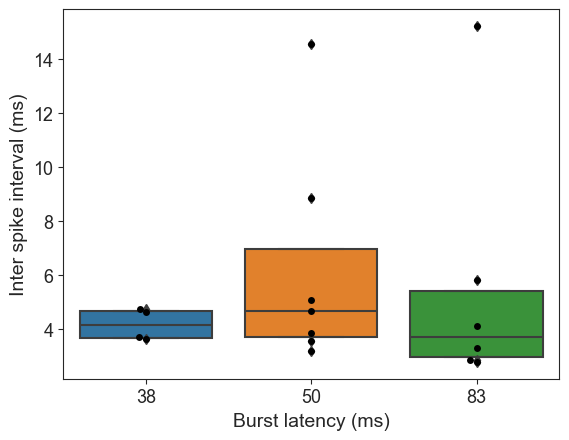

In [17]:
sns.boxplot(x= 'Burst latency (ms)', y = 'Inter spike interval (ms)', data = data_L, whis=np.NaN)
sns.swarmplot(x= 'Burst latency (ms)', y = 'Inter spike interval (ms)',
              data = data_L, color='black')


## Experiment 2- Does the background current (synaptic, neuromodulation etc) affect the frequency of bursting in TRN?

In [18]:
T= duration_of_sim(0, 4000, dt=0.01)
Ibg1=-0.45
Ibg2=-0.5
Ibg3=-0.55

In [19]:




### chose bg current with noise
sigma= 100e-6   ### choose 30e-6 if you want the noise to be more
bgcurrent1=np.zeros(len(T)) 
bgcurrent2=np.zeros(len(T)) 
bgcurrent3=np.zeros(len(T)) 

for n,t in enumerate(T): # for t =t_max
    u=random.random()
    I_bg1=inputcurrent(-0.45,u,sigma,2000,dt=0.01)
    I_bg2=inputcurrent(-0.50,u,sigma,2000, dt=0.01)
    I_bg3=inputcurrent(-0.55,u,sigma,2000, dt=0.01)
    bgcurrent1[n]+=I_bg1
    bgcurrent2[n]+=I_bg2
    bgcurrent3[n]+=I_bg3

allvariables_TC_1=generateburstsTC(bgcurrent1,T,C_m, dt=0.01, regime_name="regime 2",k=0)
# allvariables_TC_2=generateburstsTC(I_TCinput2,T,C_m, dt=0.01, regime_name="regime 1",k=0)
allvariables_TC_3=generateburstsTC(bgcurrent2,T,C_m, dt=0.01, regime_name="regime 2",k=0)
# allvariables_TC_4=generateburstsTC(I_TCinput4,T,C_m, dt=0.01, regime_name="regime 1",k=0)
allvariables_TC_5=generateburstsTC(bgcurrent3,T,C_m, dt=0.01, regime_name="regime 2",k=0)


0.01
0.015
0.01
0.015
0.01
0.015


#### try different background current inputs with noise

In [21]:
### try background current with noise, example 1

I_bgN=inputcurrentnoise(-0.45,100e-2,0.01,2, T)
bg1=Ibg1*np.ones(len(T))+I_bgN

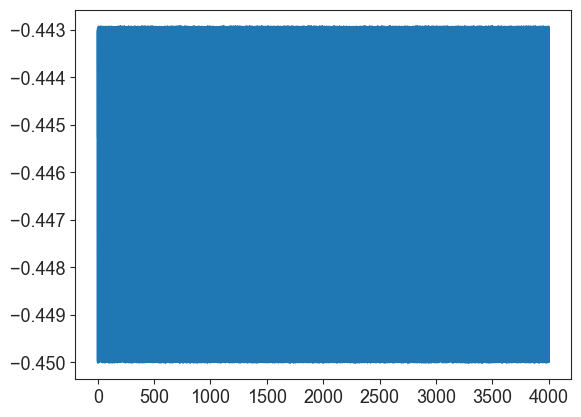

In [22]:
plt.plot(T, bg1)

In [23]:
### two more TC simulation with different inout styles --> sine is used to mimic oscillatory noise input


fs1=4000
f1=fs1/100

y1 = 0.05*np.sin(2*np.pi*f1 * (T/fs1)) + Ibg2
y0=np.zeros(len(T))
I_TCinput3= Ibg2*np.ones(len(T))

In [24]:

## simulate using backgorund current example 1 with noise
allvariables_TC_1=generateburstsTC(bg1,T,C_m, dt=0.01, regime_name="regime 2",k=0)

allvariables_TC_3_sine=generateburstsTC(y1,T,C_m, dt=0.01, regime_name="regime 2",k=0)
# allvariables_TC_none=generateburstsTC(y0,T,C_m, dt=0.01, regime_name="regime 1",k=0)
allvariables_TC_3=generateburstsTC(I_TCinput3,T,C_m, dt=0.01, regime_name="regime 2",k=0)



0.01
0.015
0.01
0.015
0.01
0.015


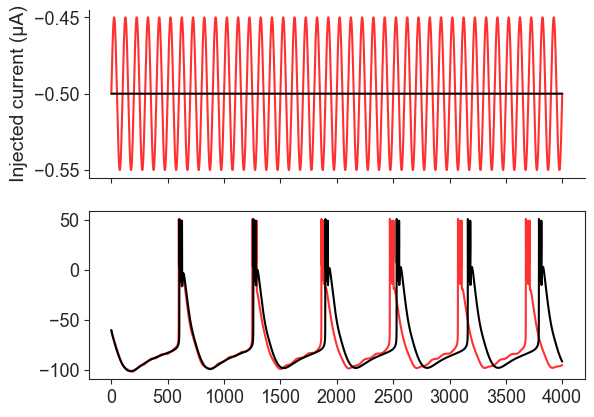

In [26]:
V_TC2_sine= allvariables_TC_3_sine['Membrane potential (mV)']
I2_sine=allvariables_TC_3_sine['Injected current (μA)']

# V_TC2_none= allvariables_TC_none['Membrane potential (mV)']
# I2_none=allvariables_TC_none['Injected current (μA)']

V_TC2= allvariables_TC_3['Membrane potential (mV)']
I2=allvariables_TC_3['Injected current (μA)']

plt.subplot(2,1,1)
# plt.plot(T,I0, label='- 0.45', color='#FFD700')


plt.plot(T,I2_sine,label='- 0.50',color='#FF3030')
# plt.plot(T,I3,label='- 0.53', color='#8B1A1A')
# plt.plot(T,I2_none,label=' 0',color='black')
plt.plot(T,I2,label=' 0',color='black')
# plt.ylim(-0.5, -0.52)
# plt.ylim(-0.5, -0.52)
# plt.xlim(0,100)

# plt.box(on=None) : removes the entire box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.yticks()
plt.ylabel('Injected current (μA)')
plt.subplot(2,1,2)
# plt.plot(T,V_TC0, label='- 0.45', color='#FFD700')
# plt.plot(T,V_TC1,label='- 0.47', color='#FF9912')
plt.plot(T,V_TC2_sine,label='- 0.50',color='#FF3030')
# plt.plot(T,V_TC2_none,label='0',color='black')
plt.plot(T,V_TC2,label='0',color='black')

#### choose bg current without noise and plot the TC simulations

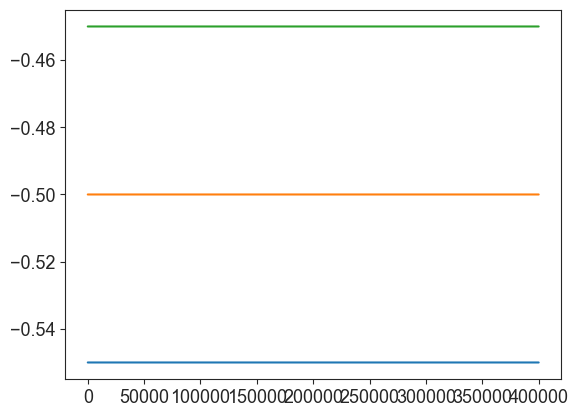

In [27]:
I_TCinput1= Ibg1*np.ones(len(T))

I_TCinput3= Ibg2*np.ones(len(T))

I_TCinput5= Ibg3*np.ones(len(T))
plt.plot(I_TCinput5)
plt.plot(I_TCinput3)
plt.plot(I_TCinput1)


In [28]:


allvariables_TC_1=generateburstsTC(I_TCinput1,T,C_m, dt=0.01, regime_name="regime 2",k=0)
# allvariables_TC_2=generateburstsTC(I_TCinput2,T,C_m, dt=0.01, regime_name="regime 1",k=0)
allvariables_TC_3=generateburstsTC(I_TCinput3,T,C_m, dt=0.01, regime_name="regime 2",k=0)
# allvariables_TC_4=generateburstsTC(I_TCinput4,T,C_m, dt=0.01, regime_name="regime 1",k=0)
allvariables_TC_5=generateburstsTC(I_TCinput5,T,C_m, dt=0.01, regime_name="regime 2",k=0)

0.01
0.015
0.01
0.015
0.01
0.015


Text(0, 0.5, 'Membrane potential (mV)')

<Figure size 640x480 with 0 Axes>

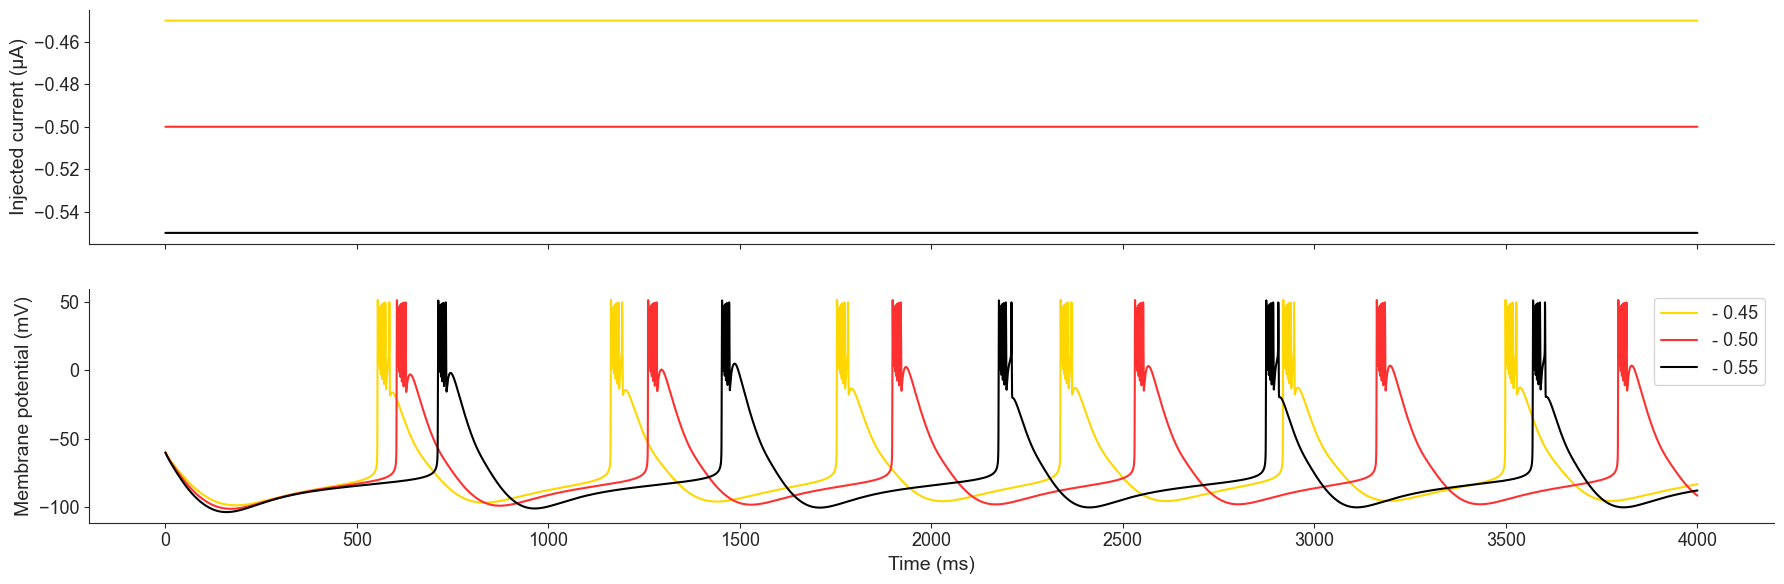

In [29]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(18,6), tight_layout=True) #7,5 is better for shorter plots


V_TC0= allvariables_TC_1['Membrane potential (mV)']
I0=allvariables_TC_1['Injected current (μA)']

# V_TC1= allvariables_TC_2['Membrane potential (mV)']
# I1=allvariables_TC_2['Injected current (μA)']

V_TC2= allvariables_TC_3['Membrane potential (mV)']
I2=allvariables_TC_3['Injected current (μA)']

# # V_TC3= allvariables_TC_4['Membrane potential (mV)']
# # I3=allvariables_TC_4['Injected current (μA)']

V_TC4= allvariables_TC_5['Membrane potential (mV)']
I4=allvariables_TC_5['Injected current (μA)']


plt.subplot(2,1,1)
plt.plot(T,I0, label='- 0.45', color='#FFD700')

# plt.plot(T,I1,label='- 0.47', color='#FF9912')
plt.plot(T,I2,label='- 0.50',color='#FF3030')
# plt.plot(T,I3,label='- 0.53', color='#8B1A1A')
plt.plot(T,I4,label='- 0.55',color='black')
# plt.ylim(-0.5, -0.52)
# plt.xlim(0,100)

# plt.box(on=None) : removes the entire box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.yticks()
plt.ylabel('Injected current (μA)')
plt.subplot(2,1,2)
plt.plot(T,V_TC0, label='- 0.45', color='#FFD700')
# plt.plot(T,V_TC1,label='- 0.47', color='#FF9912')
plt.plot(T,V_TC2,label='- 0.50',color='#FF3030')
# # plt.plot(T,V_TC3,label='- 0.53', color='#8B1A1A')
plt.plot(T,V_TC4,label='- 0.55',color='black')
# plt.xlim(500,750)
# plt.title('Background current affects the frequency of bursts in TRN')

# plt.title('gLmax value affects the frequency of bursts in TRN')
# label ='RMP= -50 mV, V_init=-50'
# plt.ylim(-60, 50)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
# plt.savefig('-ve input Regime 1 gLmaxTRN 0.09, V_L -77mV white.pdf', bbox_inches = 'tight')
# plt.savefig('final ISI zoom. test effect of bg current on the frequency of bursts in TC gLmax= 0.01, gH=0.15, gT=2.pdf', bbox_inches = 'tight')

### Analyse the spikng behavior - find the interspike and inter burst interval

In [30]:

spike_train0, spike_time0= generatespikes(V_pre=V_TC0, V_th=25, T =T, dt=0.01)

# spike_train1, spike_time1= generatespikes(V_pre=V_TC1, V_th=25, T =T, dt=0.01)

spike_train2, spike_time2= generatespikes(V_pre=V_TC2, V_th=25, T =T, dt=0.01)

# spike_train3, spike_time3= generatespikes(V_pre=V_TC3, V_th=25, T =T, dt=0.01)

spike_train4, spike_time4= generatespikes(V_pre=V_TC4, V_th=25, T =T, dt=0.01)

isi_0=[]
# isi_1=[]
isi_2=[]
# isi_3=[]
isi_4=[]

isi_0 = np.diff(spike_time0)
# isi_1 = np.diff(spike_time1)
isi_2 = np.diff(spike_time2)
# isi_3 = np.diff(spike_time3)
isi_4 = np.diff(spike_time4)
idx0 = np.where(isi_0>500)
ibi_0 = isi_0[idx0]
id0=np.where(isi_0<500)
isi_0=isi_0[id0]
# idx1 = np.where(isi_1>250)
# ibi_1 = isi_1[idx1]
# id1=np.where(isi_1<250)
# isi_1=isi_1[id1]
idx2 = np.where(isi_2>500)
ibi_2 = isi_2[idx2]
id2=np.where(isi_2<500)
isi_2=isi_2[id2]
# idx3 = np.where(isi_3>250)
# ibi_3 = isi_3[idx3]
# id3=np.where(isi_3<250)
# isi_3=isi_3[id3]
idx4 = np.where(isi_4>500)
ibi_4 = isi_4[idx4]
id4=np.where(isi_4<500)
isi_4=isi_4[id4]
print(ibi_0)
# print(ibi_1)
print(ibi_2)
# print(ibi_3)
print(ibi_4)



[]
[]
[]
[578.71 561.23 555.35 553.08 552.18]
[633.79 616.49 611.66 610.11 609.57]
[721.19 704.45 665.22 665.23]


In [31]:
inter_spike_intervals_bgcurrent={'isi_values':[list(isi_0), list(isi_2), list(isi_4)], 'tag': ['isi_0', 'isi_2', 'isi_4'] }

df= pd.DataFrame(inter_spike_intervals_bgcurrent, columns= ['isi_values', 'tag']) 

df
# split_df = pd.DataFrame(df['isi_values'].tolist())
# split_df=split_df.T
# # split_df=pd.DataFrame(split_df, columns=['isi_0', 'isi_2', 'isi_4'])
# split_df
# isi0={"isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0","isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0" ,"isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0"}
# isi2={"isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2","isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2"}
# isi4={"isi_4", "isi_4", "isi_4", "isi_4", "isi_4", "isi_4","isi_4", "isi_4", "isi_4", "isi_4", "isi_4", "isi_4","isi_4", "isi_4", "isi_4", "isi_4", "isi_4", "isi_4","isi_4", "isi_4", "isi_4", "isi_4", "isi_4", "isi_4","isi_4", "isi_4", "isi_4", "isi_4", "isi_4", "isi_4","isi_4", "isi_4", "isi_4", "isi_4", "isi_4", "isi_4","isi_4", "isi_4", "isi_4", "isi_4", "isi_4", "isi_4" }

# for index, col in split_df.iterrows():
#     np.append(col['c1'], col['c2'])
# df.assign(isi_values=df['isi_values'].str.split(',')).explode('isi_values')
# sns.swarmplot(x=df['tag'], y=df['isi_values'])

,isi_values,tag
0,"[2.4899999999998954, 2.4400000000000546, 2.720...",isi_0
1,"[2.580000000000041, 2.560000000000059, 2.89999...",isi_2
2,"[2.7799999999999727, 2.8700000000000045, 3.379...",isi_4


In [32]:
isi_values= np.append(isi_0, isi_2)
isi_values=np.append(isi_values, isi_4)

isi_values

isi0=["isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0","isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0" ,"isi_0", "isi_0", "isi_0", "isi_0", "isi_0", "isi_0"]
isi2=["isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2","isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2", "isi_2"]
isi4=["isi_4", "isi_4", "isi_4", "isi_4","isi_4", "isi_4", "isi_4", "isi_4", "isi_4", "isi_4","isi_4", "isi_4", "isi_4", "isi_4", "isi_4", "isi_4","isi_4", "isi_4", "isi_4", "isi_4", "isi_4", "isi_4","isi_4", "isi_4", "isi_4", "isi_4", "isi_4", "isi_4" ]
# len(isi_values)
isi_tags=isi0 + isi2 + isi4
isi_tags

inter_spike_intervals_bgcurrent={'isi_values':isi_values, 'tag': isi_tags }
data= pd.DataFrame(inter_spike_intervals_bgcurrent, columns= ['isi_values', 'tag']) 
data


,isi_values,tag
0,2.49,isi_0
1,2.44,isi_0
2,2.72,isi_0
3,3.13,isi_0
4,3.79,isi_0
...,...,...
101,2.75,isi_4
102,3.17,isi_4
103,3.88,isi_4
104,5.37,isi_4


In [33]:
## EFFICIENT method

isi_values= np.append(isi_0, isi_2)
isi_values=np.append(isi_values, isi_4)
isi_values

ibi_values= np.append(ibi_0, ibi_2)
ibi_values=np.append(ibi_values, ibi_4)
ibi_values

tag1=['- 0.45']
tag2=['- 0.50']
tag3=['- 0.55']
isi_tags=[]
q=""
tags=[]
tags=np.append(tag1,tag2)
tags=np.append(tags, tag3)
tags

l1=[len(isi_0), len(isi_2), len(isi_4)]
# print(len(isi_0))
for j in range(len(tags)):
        for i in range(l1[j]):
                isi_tags+= [tags[j]]
        
isi_tags

ibi_tags=[]
l2=[len(ibi_0), len(ibi_2), len(ibi_4)]
# print(len(isi_0))
for j in range(len(tags)):
        for i in range(l2[j]):
                ibi_tags+= [tags[j]]

inter_spike_interval_bgcurrent= {'Inter spike interval (ms)':isi_values, 'Background current (μA)': isi_tags }
inter_burst_interval_bgcurrent={'Inter burst interval (ms)':ibi_values, 'Background current (μA)': ibi_tags }
burst_properties_bgcurrent={'Inter burst interval (ms)':ibi_values,'Inter spike interval (ms)':isi_values, 'Background current (μA)': isi_tags }
## save this data

inter_spike_interval_bgcurrent= {'Inter spike interval (ms)':isi_values, 'Background current (μA)': isi_tags }
data_isi= pd.DataFrame(inter_spike_interval_bgcurrent, columns= ['Inter spike interval (ms)', 'Background current (μA)']) 
data_isi

data_ibi= pd.DataFrame(inter_burst_interval_bgcurrent, columns= ['Inter burst interval (ms)', 'Background current (μA)']) 
data_ibi


,Inter burst interval (ms),Background current (μA)
0,578.71,- 0.45
1,561.23,- 0.45
2,555.35,- 0.45
3,553.08,- 0.45
4,552.18,- 0.45
5,633.79,- 0.50
6,616.49,- 0.50
7,611.66,- 0.50
8,610.11,- 0.50
9,609.57,- 0.50


In [34]:
import os
from pathlib import Path  


In [35]:

data_isi= pd.DataFrame(inter_spike_interval_bgcurrent, columns= ['Inter spike interval (ms)', 'Background current (μA)']) 


data_ibi= pd.DataFrame(inter_burst_interval_bgcurrent, columns= ['Inter burst interval (ms)', 'Background current (μA)']) 
data_ibi

,Inter burst interval (ms),Background current (μA)
0,578.71,- 0.45
1,561.23,- 0.45
2,555.35,- 0.45
3,553.08,- 0.45
4,552.18,- 0.45
5,633.79,- 0.50
6,616.49,- 0.50
7,611.66,- 0.50
8,610.11,- 0.50
9,609.57,- 0.50


c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


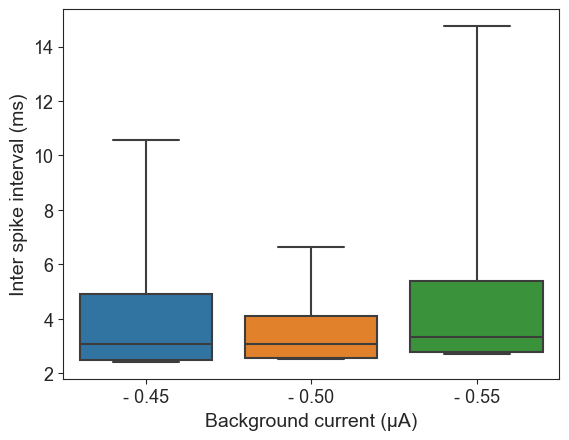

In [36]:
### plot using swarm or box plot

sns.boxplot(x='Background current (μA)', y = 'Inter spike interval (ms)',
              data = data_isi, whis=np.inf)
# sns.swarmplot(x='Background current (μA)', y = 'Inter spike interval (ms)',data = data_isi, color=".2")
# plt.show()
plt.savefig('wo points- ISI. test effect of bg current on the frequency of bursts in TC gLmax= 0.01, gH=0.15, gT=2.pdf', bbox_inches = 'tight')



c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


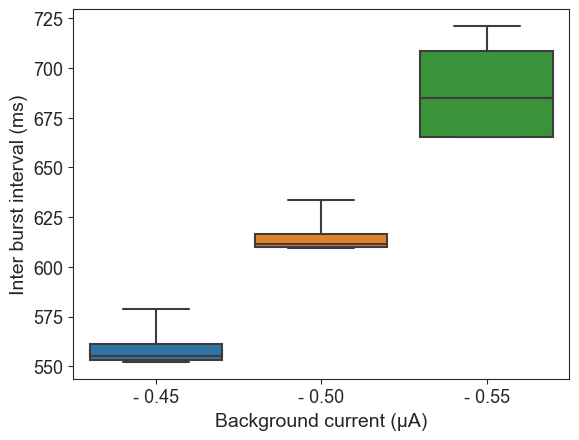

In [37]:

sns.boxplot(x='Background current (μA)', y = 'Inter burst interval (ms)',
              data = data_ibi, whis=np.inf)
# sns.swarmplot(x='Background current (μA)', y = 'Inter burst interval (ms)',data = data_ibi, color=".2")

plt.savefig('wo points- IBI. test effect of bg current on the frequency of bursts in TC gLmax= 0.01, gH=0.15, gT=2.pdf', bbox_inches = 'tight')

C:\Users\mramada\AppData\Local\Temp\ipykernel_19708\1529791897.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Background current (μA)', y = 'Inter burst interval (ms)',
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isins

<Axes: xlabel='Background current (μA)', ylabel='Inter burst interval (ms)'>

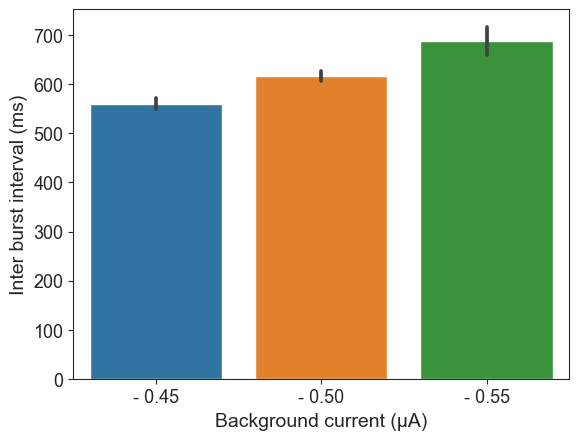

In [38]:
sns.barplot(x='Background current (μA)', y = 'Inter burst interval (ms)',
              data = data_ibi,  ci='sd')

# sns.despine()

# plt.savefig('bar IBI. test effect of bg current on the frequency of bursts in TC gLmax= 0.01, gH=0.15, gT=2.pdf', bbox_inches = 'tight')

# palette="Blues_d"

c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

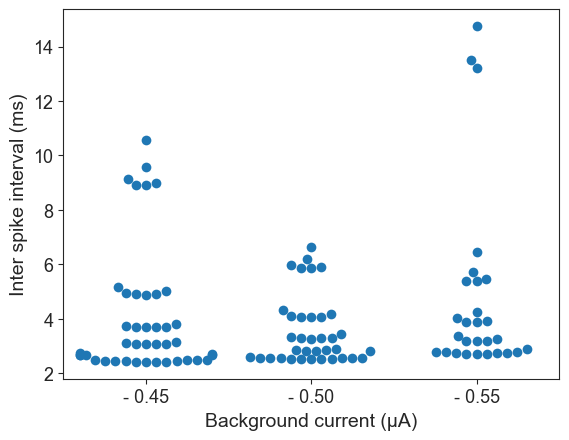

c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

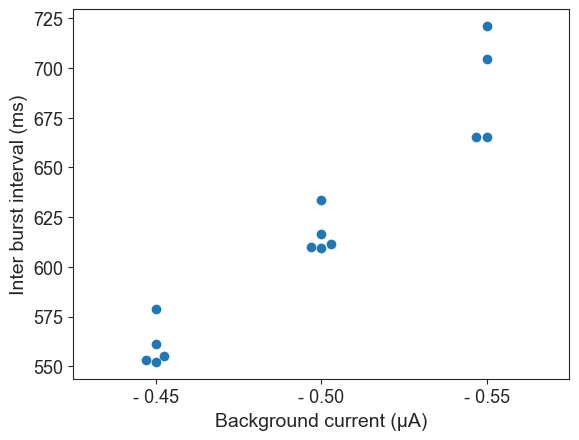

In [39]:

sns.swarmplot(x='Background current (μA)', y = 'Inter spike interval (ms)',
              data = data_isi, size=7)
plt.show()

sns.swarmplot(x='Background current (μA)', y = 'Inter burst interval (ms)',
              data = data_ibi,size=7)
plt.show()

In [ ]:
### how to add the same string to multiple rows???

tag1=['-0.45']
tag2=['-0.50']
tag3=['-0.55']
isi_tags=[]
q=""
tags=[]
tags=np.append(tag1,tag2)
tags=np.append(tags, tag3)
tags

l=[len(isi_0), len(isi_2), len(isi_4)]
# print(len(isi_0))
for j in range(len(tags)):
        for i in range(l[j]):
                isi_tags+= [tags[j]]
        
isi_tags

## Experiment 3: for Results Figure 1- importance of intrinsic currents in generating bursts in TC

set individual currents to zero 

In [40]:
T= duration_of_sim(0, 500, dt=0.01)

I_TCinput= 0*np.ones(len(T))
I_TCinput[10000:12000]= -1.5
# I_TCinput[50000:52000]= -1.5
# I_TCinput[100000:102000]= -1.5
# I_TCinput[150000:152000]= -1.5


In [41]:
allvariables_TC=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="regime 2",k=0)

0.01
0.015


In [42]:
allvariables_TC_0gT=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="regime 2",k=0)

0.01
0.015


In [46]:
allvariables_TC_gH0=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=0)

0.01
0


In [47]:
allvariables_TC_gH005=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=1)

0.01
0.005


In [ ]:
allvariables_TC_gH25=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=6)

0.01
0.025


In [49]:
allvariables_TC_0gTgH=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="gT and gH=0",k=0)

0.01
0


In [50]:
allvariables_TC_0gHgNagK=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="gH=gK=gNa=0",k=0)

0.01
0


Text(0, 0.5, 'Membrane potential (mV)')

<Figure size 640x480 with 0 Axes>

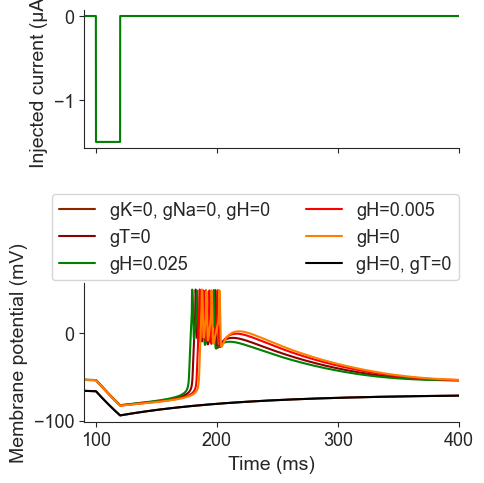

In [ ]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(5,5), tight_layout=True) #7,5 is better for shorter plots


# V_TC= allvariables_TC['Membrane potential (mV)']
I=allvariables_TC_0gHgNagK['Injected current (μA)']

V_TC_0gNaKh=allvariables_TC_0gHgNagK['Membrane potential (mV)']
V_TC_0gT=allvariables_TC_0gT['Membrane potential (mV)']
V_TC_gH25=allvariables_TC_gH25['Membrane potential (mV)']
V_TC_0gHgT=allvariables_TC_0gTgH['Membrane potential (mV)']
V_TC_gH005=allvariables_TC_gH005['Membrane potential (mV)']
V_TC_gH0=allvariables_TC_gH0['Membrane potential (mV)']

plt.subplot(2,1,1)
plt.plot(T,I, color= 'green')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.xlim(90,400)
plt.ylabel('Injected current (μA)')
plt.subplot(2,1,2)
# plt.plot(T,V_TC, label ='gH=0.015', color='#FF4500')
plt.plot(T, V_TC_0gNaKh, label='gK=0, gNa=0, gH=0', color='#8B2500')
plt.plot(T, V_TC_0gT, label= 'gT=0', color='#8B0000')
plt.plot(T, V_TC_gH25, label= 'gH=0.025', color= 'green')
plt.plot(T, V_TC_gH005, label= 'gH=0.005', color= 'red')#FF8000')
plt.plot(T, V_TC_gH0, label= 'gH=0', color= '#FF8000')
plt.plot(T,V_TC_0gHgT, label = 'gH=0, gT=0', color='black')

plt.xlim(90,400)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.legend(loc=y)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,ncol=2, borderaxespad=0.)

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
# plt.savefig('gH is important for bursts in TC, gK, gH, gNa =0 TC bursts.pdf', bbox_inches = 'tight')

## Experiment 4: change gT values to see if that affects the burtsing properties of TC cells

In [9]:
T= duration_of_sim(0, 1000, dt=0.01)

I_TCinput= 0*np.ones(len(T))
I_TCinput[10000:12000]= -1.5
# I_TCinput[50000:52000]= -1.5
# I_TCinput[100000:102000]= -1.5
# I_TCinput[150000:152000]= -1.5


In [10]:
# gT=0.5
allvariables_TC_gT50=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gT", k=0)


0.01
0.015


In [11]:
# gT=0.75
allvariables_TC_gT75=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gT",k=1)

0.01
0.015


In [12]:
# gT=1
allvariables_TC_gT1=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gT",k=2)

0.01
0.015


In [13]:
# gT=1.5
allvariables_TC_gT150=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gT",k=3)

0.01
0.015


In [14]:
# gT=2
allvariables_TC_gT2=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gT",k=0)

0.01
0.015


Text(0, 0.5, 'Membrane potential (mV)')

<Figure size 640x480 with 0 Axes>

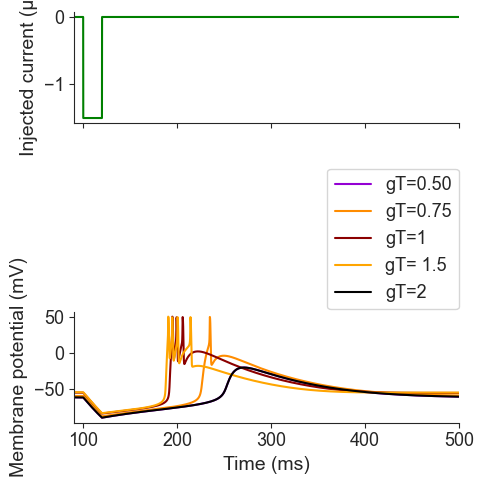

In [15]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(5,5), tight_layout=True) #7,5 is better for shorter plots


# V_TC= allvariables_TC['Membrane potential (mV)']
I=allvariables_TC_gT50['Injected current (μA)']
V_TC_gT50=allvariables_TC_gT50['Membrane potential (mV)']
V_TC_gT75=allvariables_TC_gT75['Membrane potential (mV)']
V_TC_gT1=allvariables_TC_gT1['Membrane potential (mV)']
V_TC_gT150=allvariables_TC_gT150['Membrane potential (mV)']
V_TC_gT2=allvariables_TC_gT2['Membrane potential (mV)']
# V_TC_gT1=allvariables_TC_gT1['Membrane potential (mV)']

plt.subplot(2,1,1)
plt.plot(T,I, color= 'green')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.xlim(90,500)
plt.ylabel('Injected current (μA)')
plt.subplot(2,1,2)
# plt.plot(T,V_TC_gT50, label ='gH=0.015', color='#FF4500')
plt.plot(T, V_TC_gT50, label='gT=0.50', color='darkviolet')
plt.plot(T, V_TC_gT75, label='gT=0.75', color='darkorange')
plt.plot(T, V_TC_gT1, label= 'gT=1', color='#8B0000')
plt.plot(T, V_TC_gT150, label= 'gT= 1.5', color= 'orange')#FF8000')
plt.plot(T, V_TC_gT2, label= 'gT=2', color= 'black')#FF8000')
# plt.plot(T, V_TC_gT1, label= 'gT=1', color= '#8B2500')#FF8000')
# plt.plot(T,V_TC_0gHgT, label = 'gH=0, gT=0', color='black')
plt.xlim(90,500)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.legend(loc=y)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,ncol=1, borderaxespad=0.)

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
# plt.savefig('gT affects the spikes per burst 3.pdf', bbox_inches = 'tight')

## Experiment 5: change gH values to see if that affects the burtsing properties of TC cells

In [16]:
T= duration_of_sim(0, 1000, dt=0.01)

I_TCinput= 0*np.ones(len(T))
I_TCinput[10000:12000]= -1.5
# I_TCinput[50000:52000]= -1.5
# I_TCinput[100000:102000]= -1.5
# I_TCinput[150000:152000]= -1.5


In [22]:
## values used: [ 0.05, 0.015, 0.025]

allvariables_TC_gH005=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=1)


0.01
0.005


In [23]:
allvariables_TC_gH015=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=3)

0.01
0.05


In [24]:
allvariables_TC_gH025=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=6)

0.01
0.02


Text(0.5, 0, 'Time (ms)')

<Figure size 640x480 with 0 Axes>

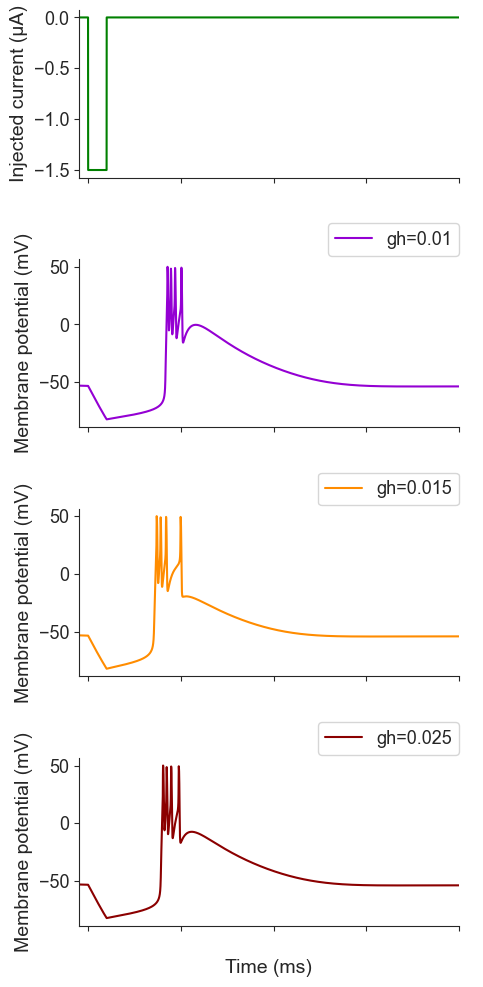

In [25]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(5,17), tight_layout=True) #7,5 is better for shorter plots


# V_TC= allvariables_TC['Membrane potential (mV)']
I=allvariables_TC_gH005['Injected current (μA)']
V_TC_gh005=allvariables_TC_gH005['Membrane potential (mV)']
V_TC_gh015=allvariables_TC_gH015['Membrane potential (mV)']
V_TC_gh025=allvariables_TC_gH025['Membrane potential (mV)']

plt.subplot(7,1,1)
plt.plot(T,I, color= 'green')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.xlim(90,500)
plt.ylabel('Injected current (μA)')
plt.subplot(7,1,2)
# plt.plot(T,V_TC_gT50, label ='gH=0.015', color='#FF4500')
plt.plot(T, V_TC_gh005, label='gh=0.01', color='darkviolet')
plt.ylabel('Membrane potential (mV)')
plt.xticks(color='w')
plt.xlim(90,500)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,ncol=1, borderaxespad=0.)

plt.subplot(7,1,3)
plt.plot(T, V_TC_gh015, label='gh=0.015', color='darkorange')
plt.ylabel('Membrane potential (mV)')
plt.xticks(color='w')
plt.xlim(90,500)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,ncol=1, borderaxespad=0.)

plt.subplot(7,1,4)
plt.plot(T, V_TC_gh025, label= 'gh=0.025', color='#8B0000')
plt.ylabel('Membrane potential (mV)')
plt.xticks(color='w')
plt.xlim(90,500)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,ncol=1, borderaxespad=0.)

# plt.plot(T, V_TC_gT1, label= 'gT=1', color= '#8B2500')#FF8000')
# plt.plot(T,V_TC_0gHgT, label = 'gH=0, gT=0', color='black')
# plt.xlim(90,500)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.xticks(color='w')
# plt.xlim(90,500)
# plt.ylabel('Membrane potential (mV)')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# plt.legend(loc=y)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,ncol=1, borderaxespad=0.)

plt.xlabel('Time (ms)')
# plt.savefig('gH affects the spikes per burst 1.pdf', bbox_inches = 'tight')

## Sag voltage and gh

In [26]:
def I_input_mels(t, dt, p, a):
  #p = period
  i = 0
  I = np.ones(len(t))*0
  c = -0.05
  cnt = 0
  while i<len(t):
    if i>4860/dt:
      break
    else:
      I[i+int(30/dt):i+int(100/dt)] = a
    i+=int(p/dt)
    c-=0.05
    cnt += 1
  return I

In [31]:
# calculate all variables for different gh (see value in g_H_list)
T= duration_of_sim(0, 1000, dt=0.01)
dt = 0.01
I_TCinput = I_input_mels(T, 0.01, 300, -0.6)

# g_H_TC_list= [0, 0.005,0.01, 0.015, 0.017, 0.02, 0.025, 0.05, 0.1,0.2,0.5]
# [0.005, 0.01, 0.015, 0.02, 0.05, 0.1, 0.2, 0.5, 0]
allvariables_TC_test0=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=0)
allvariables_TC_test1=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=1)
allvariables_TC_test2=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=2)
allvariables_TC_test3=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=3)
allvariables_TC_test4=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=5)
allvariables_TC_test5=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=7)
allvariables_TC_test6=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=8)
allvariables_TC_test7=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=9)
allvariables_TC_test8=generateburstsTC(I_TCinput,T,C_m, dt=0.01, regime_name="test_gH",k=10)

0.01
0
0.01
0.005
0.01
0.01
0.01
0.05
0.01
0.017
0.01
0.025
0.01
0.05
0.01
0.1
0.01
0.2


Text(0, 0.5, 'Membrane potential (mV)')

<Figure size 640x480 with 0 Axes>

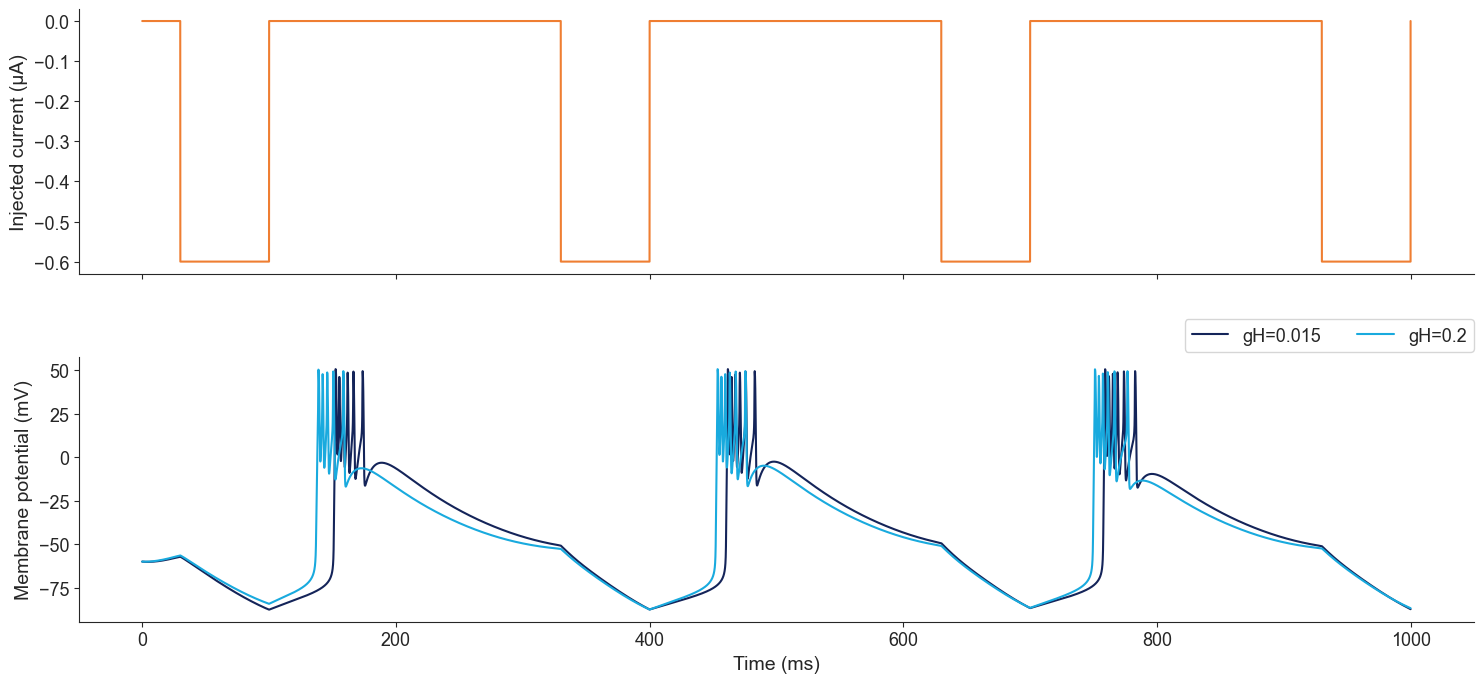

In [32]:
#plot 2 values for gh
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(15,7), tight_layout=True) #7,5 is better for shorter plots


V_TC0= allvariables_TC_test1['Membrane potential (mV)']
I0=allvariables_TC_test1['Injected current (μA)']

V_TC1= allvariables_TC_test3['Membrane potential (mV)']
I1=allvariables_TC_test3['Injected current (μA)']

V_TC2= allvariables_TC_test7['Membrane potential (mV)']
I2=allvariables_TC_test7['Injected current (μA)']

plt.subplot(2,1,1)
plt.plot(T,I2, color= '#EF7E32')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('Injected current (μA)')

plt.subplot(2,1,2)

plt.plot(T,V_TC1,label='gH=0.015', color='#142459')
plt.plot(T,V_TC2,label='gH=0.2', color='#19AADE')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,
           ncol=2, borderaxespad=0.)

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')

(400.0, 525.0)

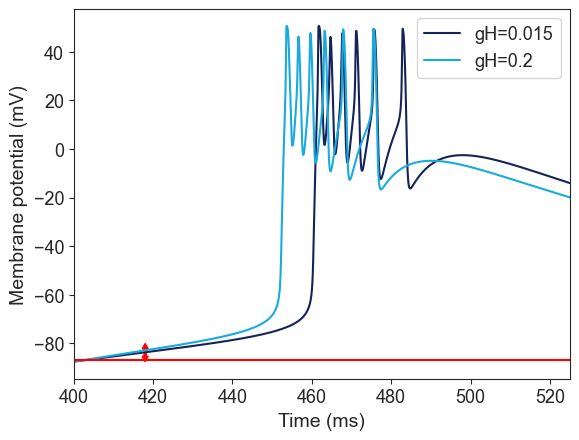

In [33]:
# zoom in
plt.plot(T,V_TC1,label='gH=0.015', color='#142459')
plt.plot(T,V_TC2,label='gH=0.2', color='#19AADE')
plt.axhline(y = -86.9, color = 'r')
plt.arrow(418, -86.9 , 0, 6.85,width=0.5, head_width=1.5, length_includes_head=True, color='r')
plt.arrow(418, -86.9+2.3, 0, -3, width=0.5, head_width=1.5, length_includes_head=True, color='r')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.legend()
plt.xlim(400, 525)

In [34]:
# calculate latency and sag for all gh conditions
V_TC = {}
V_TC0= allvariables_TC_test1['Membrane potential (mV)']
I0=allvariables_TC_test1['Injected current (μA)']
V_TC['V_TC0'] = V_TC0

V_TC1= allvariables_TC_test2['Membrane potential (mV)']
I1=allvariables_TC_test2['Injected current (μA)']
V_TC['V_TC1'] = V_TC1

V_TC2= allvariables_TC_test3['Membrane potential (mV)']
I2=allvariables_TC_test3['Injected current (μA)']
V_TC['V_TC2'] = V_TC2

V_TC3= allvariables_TC_test4['Membrane potential (mV)']
I3=allvariables_TC_test4['Injected current (μA)']
V_TC['V_TC3'] = V_TC3

V_TC4= allvariables_TC_test5['Membrane potential (mV)']
I4=allvariables_TC_test5['Injected current (μA)']
V_TC['V_TC4'] = V_TC4

V_TC5= allvariables_TC_test6['Membrane potential (mV)']
I5=allvariables_TC_test6['Injected current (μA)']
V_TC['V_TC5'] = V_TC5

V_TC6= allvariables_TC_test7['Membrane potential (mV)']
I6=allvariables_TC_test7['Injected current (μA)']
V_TC['V_TC6'] = V_TC6

V_TC7= allvariables_TC_test8['Membrane potential (mV)']
I7=allvariables_TC_test8['Injected current (μA)']
V_TC['V_TC7'] = V_TC7

V_TC8= allvariables_TC_test0['Membrane potential (mV)']
I8=allvariables_TC_test0['Injected current (μA)']
V_TC['V_TC8'] = V_TC8
latency = {}
sag = {}
i_end_hp = int(400/dt)
for i in range(9):
  V_TCi = 'V_TC' + str(i)
  i_peak_burst = np.argmax(V_TC[V_TCi][i_end_hp:i_end_hp+int(100/dt)]) + i_end_hp
  latency[V_TCi] = (i_peak_burst - i_end_hp)*dt
  sag[V_TCi] = V_TC[V_TCi][i_end_hp+int(20/dt)] - V_TC[V_TCi][i_end_hp]

0.8735959965580741


Text(0.1, 85, 'R² = 0.8736')

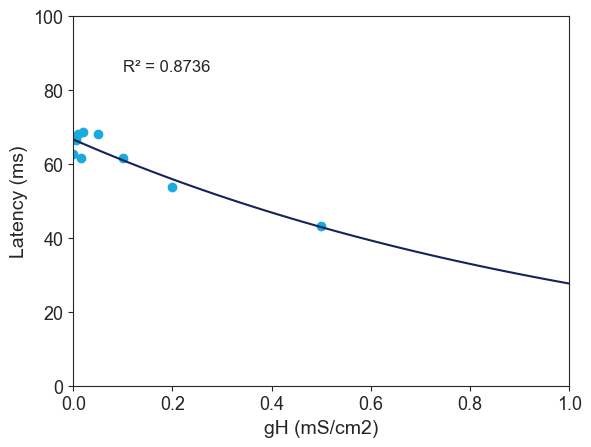

In [35]:
# gh vs latency
g_H_list = list([0.005, 0.01, 0.015, 0.02, 0.05, 0.1, 0.2, 0.5, 0])
plt.scatter(g_H_list, latency.values(), color = "#19AADE")
plt.xlabel('gH (mS/cm2)')
plt.ylabel('Latency (ms)')

# fit and calculate r**2
x = g_H_list
y = list(latency.values())
p = np.polyfit(x, np.log(y), 1)
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(x)-1, np.max(x)+1, 100)
y_fitted = a * np.exp(b * x_fitted)
plt.plot(x_fitted, y_fitted, color = '#142459')
plt.xlim(0, 1)
plt.ylim(0, 100)
x = np.array(x)
y_fitted = a * np.exp(b * x)
corr_matrix = np.corrcoef(y, y_fitted)
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)
plt.text(0.1, 85, f'R² = {R_sq:.4f}')
#plt.legend()

0.0010343745513847042


Text(0.1, 18, 'R² = 0.0010')

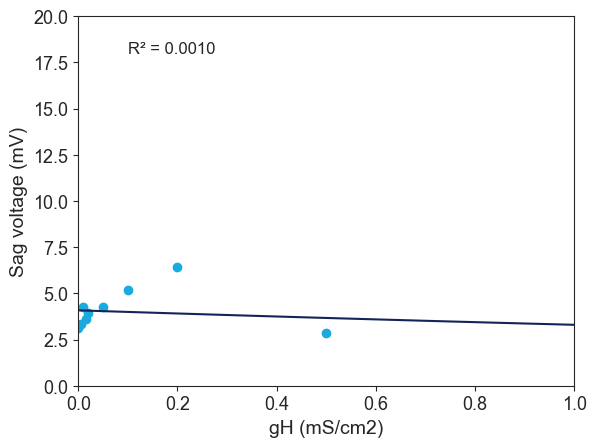

In [36]:
# gh vs sag
g_H_list = list([0, 0.005, 0.01, 0.015, 0.02, 0.05, 0.1, 0.2, 0.5])
plt.scatter(g_H_list, sag.values(), color = "#19AADE")
plt.xlabel('gH (mS/cm2)')
plt.ylabel('Sag voltage (mV)')

# fit and calculate r**2
x = g_H_list
y = list(sag.values())
p = np.polyfit(x, np.log(y), 1)
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(x)-1, np.max(x)+1, 100)
y_fitted = a * np.exp(b * x_fitted)
plt.plot(x_fitted, y_fitted, color = '#142459')
plt.xlim(0, 1)
plt.ylim(0, 20)
x = np.array(x)
y_fitted = a * np.exp(b * x)
corr_matrix = np.corrcoef(y, y_fitted)
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)
plt.text(0.1, 18, f'R² = {R_sq:.4f}')
#plt.legend()

0.7521135495751731


Text(3, 30, 'R² = 0.7521')

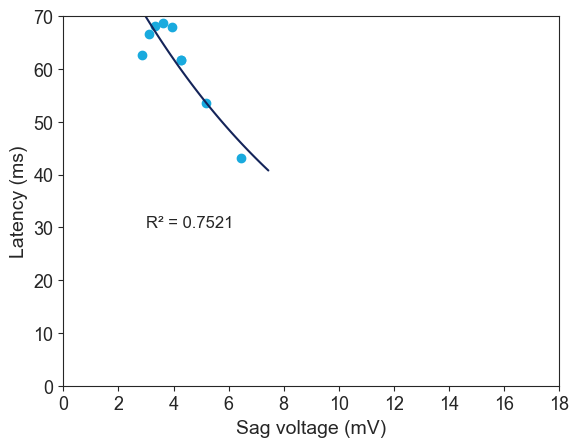

In [37]:
# sag vs latency
x = list(sag.values())
y = list(latency.values())
plt.scatter(x, y, color = "#19AADE")
plt.ylabel('Latency (ms)')
plt.xlabel('Sag voltage (mV)')

# fit and calculate r**2
p = np.polyfit(x, np.log(y), 1)
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(x)-1, np.max(x)+1, 100)
y_fitted = a * np.exp(b * x_fitted)
plt.plot(x_fitted, y_fitted, color = '#142459')
plt.xlim(0, 18)
plt.ylim(0, 70)
x = np.array(x)
y_fitted = a * np.exp(b * x)
corr_matrix = np.corrcoef(y, y_fitted)
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)

plt.text(3, 30, f'R² = {R_sq:.4f}')

## Experiment- can we reproduce Varela 2020 fig 3D? - does cortical downstate trigger bursting in TC?

In [38]:
T= duration_of_sim(0, 1000, dt=0.01)

# I_TCinput= 0*np.ones(len(T))
# I_TCinput[10000:12000]= -1.5
# I_TCinput[50000:52000]= -1.5
# I_TCinput[100000:102000]= -1.5
# I_TCinput[150000:152000]= -1.5

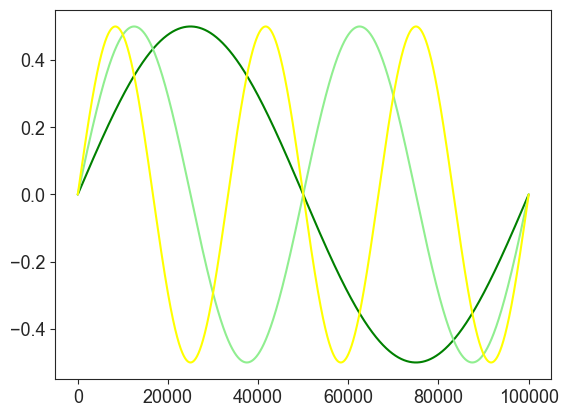

In [39]:
## Simulate downstate inputs using sinusoidal fuction --> try different frequencies

fs1 = 100000 
fs2 = 100000 # sample rate 
f1 = 1 # the frequency of the signal
f2= 2
f3=3
x1 = np.arange(fs1)
x2 = np.arange(fs2) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y1 = 0.5*np.sin(2*np.pi*f1 * (x1/fs1)) 
y2 = 0.5*np.sin(2*np.pi*f2 * (x2/fs2)) 
y3 =  0.5*np.sin(2*np.pi*f3 * (x1/fs1)) 
#this instruction can only be used with IPython Notbook. 
# % matplotlib inline
# showing the exact location of the smaples
plt.plot(x1,y1, color='green')
plt.plot(x2,y2, color='lightgreen')
plt.plot(x2,y3, color='yellow')

In [40]:
T= duration_of_sim(0, 3000, dt=0.01)

I_TCinput1= np.zeros(len(T))
I_TCinput2= np.zeros(len(T))
I_TCinput3= np.zeros(len(T))
I_TCinput1[30000:130000]= y1[0:100000]
I_TCinput2[30000:80000]= y2[0:50000]  ## sine wave given for 1 seconds 
I_TCinput3[30000:63000]= y3[0:33000]
# I_TCinput[100000:102000]= -1.5
# I_TCinput[150000:152000]= -1.5

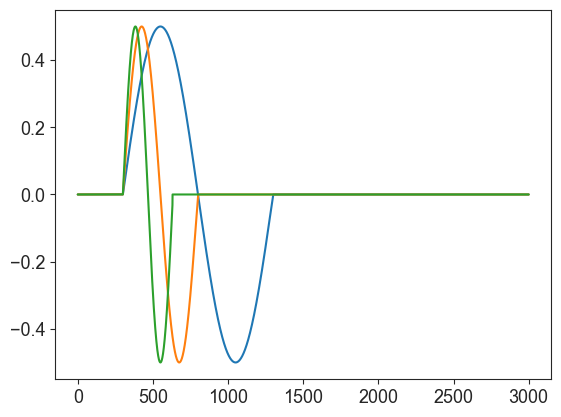

In [41]:
plt.plot(T,I_TCinput1)
plt.plot(T,I_TCinput2)
plt.plot(T,I_TCinput3)
# plt.xlim(50,200)

In [42]:
allvariables_TC_SO1=generateburstsTC(I_TCinput1,T,C_m, dt=0.01, regime_name="regime 2",k=0)
allvariables_TC_SO2=generateburstsTC(I_TCinput2,T,C_m, dt=0.01, regime_name="regime 2",k=0)
allvariables_TC_SO3=generateburstsTC(I_TCinput3,T,C_m, dt=0.01, regime_name="regime 2",k=0)

0.01
0.015
0.01
0.015
0.01
0.015


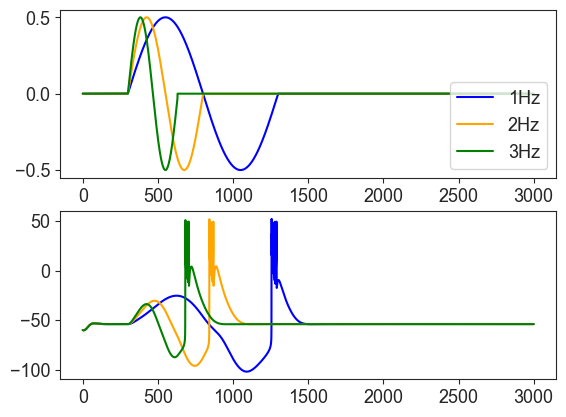

In [43]:
V_TC_SO1=allvariables_TC_SO1['Membrane potential (mV)']
V_TC_SO2=allvariables_TC_SO2['Membrane potential (mV)']
V_TC_SO3=allvariables_TC_SO3['Membrane potential (mV)']

plt.subplot(2,1,1)
plt.plot(T,I_TCinput1, color='blue',label='1Hz')
plt.legend(loc=4)
plt.plot(T,I_TCinput2, color='orange', label='2Hz')
plt.legend(loc=4)
plt.plot(T,I_TCinput3, color='green', label='3Hz')
plt.legend(loc=4)

plt.subplot(2,1,2)
plt.plot(T, V_TC_SO1,  color= 'blue')#FF8000'
plt.plot(T, V_TC_SO2,  color= 'orange')#FF8000
plt.plot(T, V_TC_SO3,  color= 'green')#

### Try simulating tonic activity --> to see if there is any way to simulate the change from tonic to bursts 

In [44]:
T= duration_of_sim(0, 2000, dt=0.01)

I_TCinputII= 0.8*np.ones(len(T))
# I_TCinputII[30000:80000]= y[50000:100000]  ## sine wave given for 1 seconds 
# I_TCinput[50000:52000]= -1.5
# I_TCinput[100000:102000]= -1.5
# I_TCinput[150000:152000]= -1.5

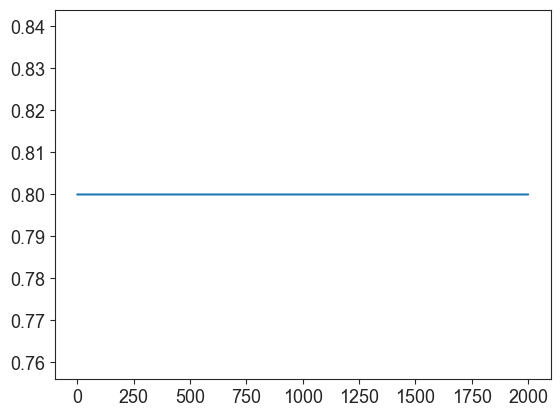

In [45]:
plt.plot(T,I_TCinputII)

In [46]:
## simulate the cell
allvariables_TC_SOII=generateburstsTC(I_TCinputII,T,C_m, dt=0.01, regime_name="regime 2",k=0)

0.01
0.015


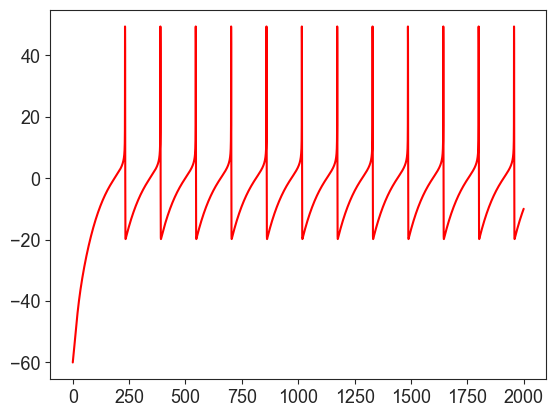

In [47]:
## plot the activity
V_TC_SOII=allvariables_TC_SOII['Membrane potential (mV)']
plt.plot(T, V_TC_SOII, color= 'red') #FF8000'

### Play around with inputs: 
a) add background current to downstate see if tonic to bursts happens
b)  adding noise to the downstate input a

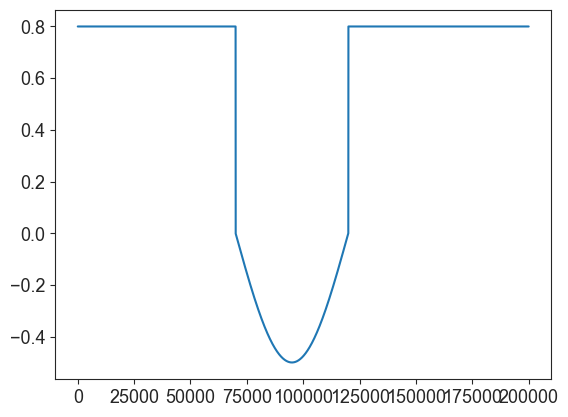

In [48]:
T= duration_of_sim(0, 2000, dt=0.01)

## multiple trials to plot the histogram of spike activity
I_TCinputIII= 0.8*np.ones(len(T))
I_TCinputIII[70000:120000]= y1[50000:100000]  ## sine wave given for 1 seconds 



plt.plot(I_TCinputIII)

In [49]:
T= duration_of_sim(0, 2000, dt=0.01)
I_bgN=inputcurrentnoise(0,200,0.01,2, T)
bg1=0.8*np.ones(len(T))+I_bgN

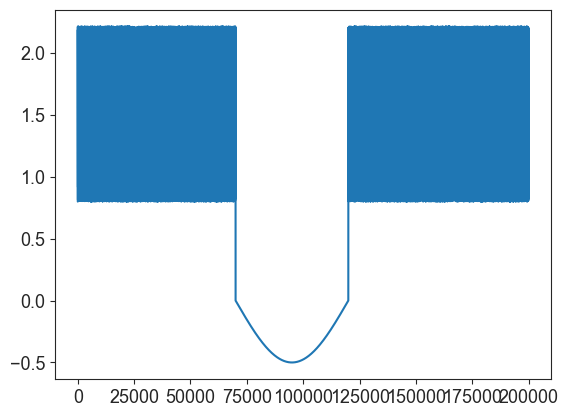

In [50]:
bg1[70000:120000]= y1[50000:100000] 
plt.plot(bg1)

In [51]:
## simulate the cell
allvariables_TC_SOIII=generateburstsTC(I_TCinputIII,T,C_m, dt=0.01, regime_name="regime 2",k=0)

0.01
0.015


In [52]:
# allvariables_TC_SOIII=generateburstsTC(bg1,T,C_m, dt=0.01, regime_name="regime 2",k=0)

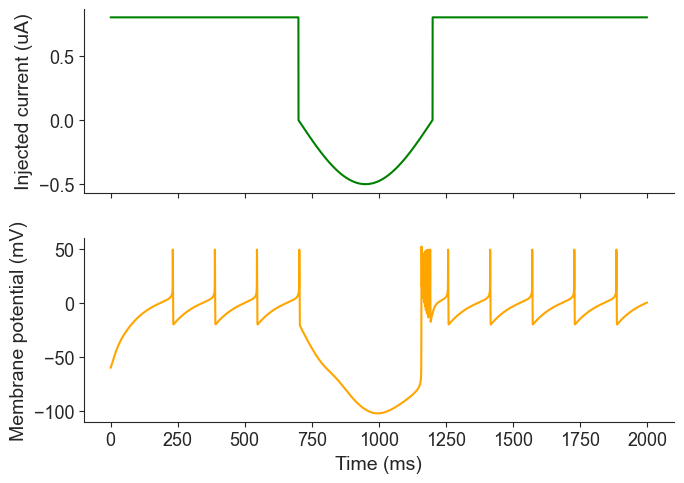

In [53]:
## plotting the transition from tonic to burst --> input with bg current and sine wave used

V_TC_SOIII=allvariables_TC_SOIII['Membrane potential (mV)']

sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]

plt.figure(figsize=(7,5), tight_layout=True)

plt.subplot(2,1,1)
plt.plot(T, I_TCinputIII, color='green')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.legend( loc='right')
plt.ylabel('Injected current (uA)')
# plt.ylim(-10, 10)

plt.subplot(2,1,2)
plt.plot(T, V_TC_SOIII, color= 'orange') #FF8000'
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
# plt.savefig('-ve input Regime 1 gLmaxTRN 0.09, V_L -77mV white.pdf', bbox_inches = 'tight')
plt.savefig('SO 1Hz LOW AMP downstate shifts thalamic activity from tonic to bursts.pdf', bbox_inches = 'tight')
# plt.xlim(200,250)
# plt.xlim(1200,1400)


#### Repeat simulations and calculate the thalamic cell spike activity historgram wrt SO downstate - many trials


0.01
0.015
0.01
0.015
0.01
0.015
0.01
0.015
0.01
0.015
0.01
0.015
0.01
0.015
0.01
0.015
0.01
0.015
0.01
0.015


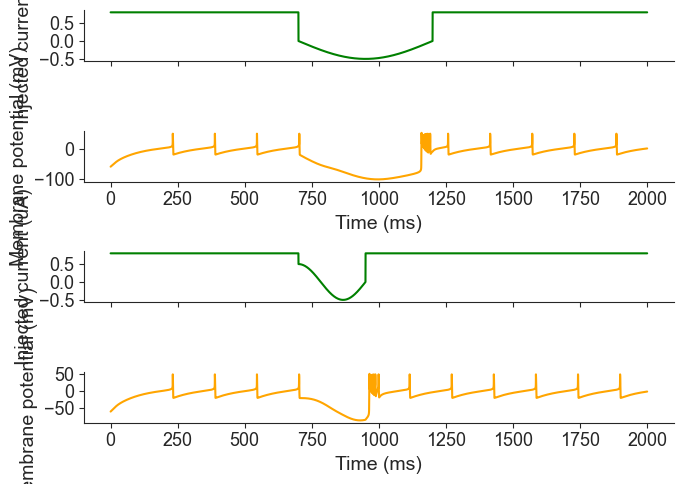

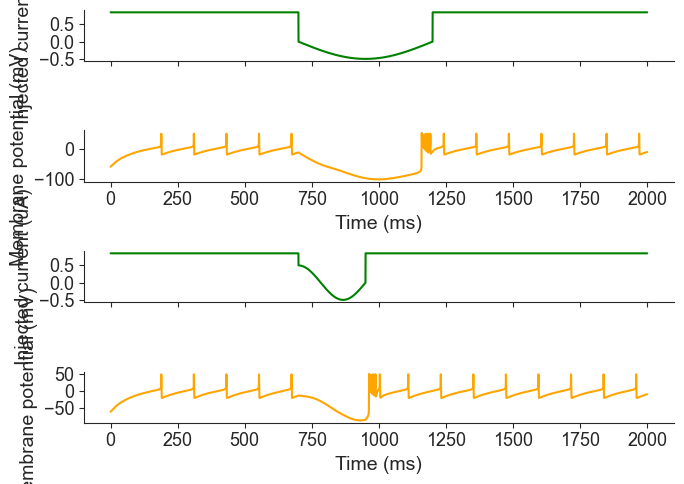

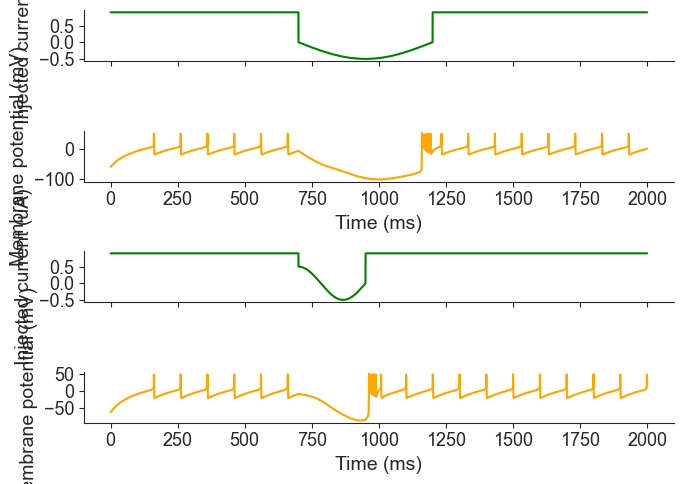

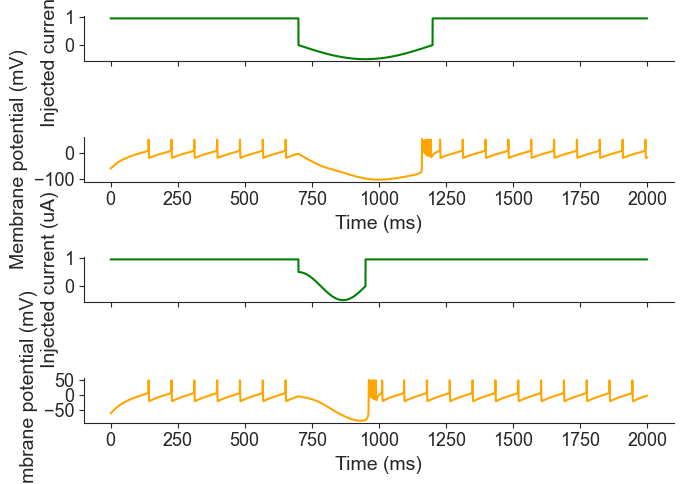

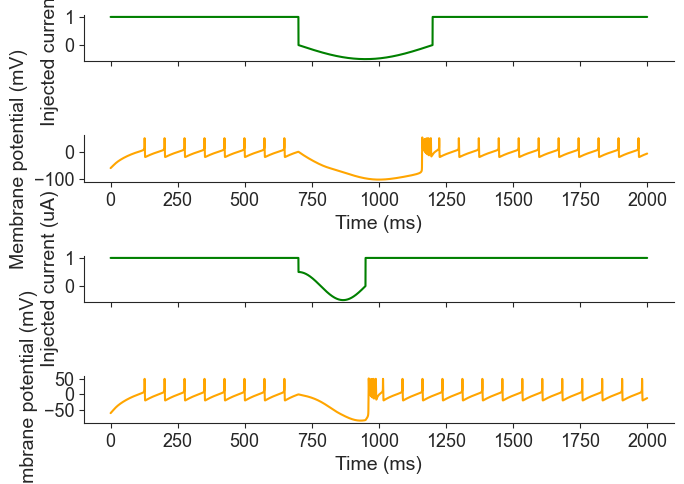

In [54]:
T= duration_of_sim(0, 2000, dt=0.01)

V_TC_SOIII= np.zeros((5,len(T)))
V_TC_SOIIIn= np.zeros((5,len(T)))

## multiple trials to plot the histogram of spike activity
bg=0.8
for i in range(5):
    
    I_TCinputIII= bg*np.ones(len(T))
    I_TC_inputIIIn=bg*np.ones(len(T))
    I_TCinputIII[70000:120000]= y1[50000:100000]  ## sine wave given for 1 seconds
    I_TC_inputIIIn[70000:95000]= y3[75000:100000]
    allvariables_TC_SOIII=generateburstsTC(I_TCinputIII,T,C_m, dt=0.01, regime_name="regime 2",k=0) 
    allvariables_TC_SOIIIn=generateburstsTC(I_TC_inputIIIn,T,C_m, dt=0.01, regime_name="regime 2",k=0) 


    V_TC_SOIII[i,:]=allvariables_TC_SOIII['Membrane potential (mV)']
    V_TC_SOIIIn[i,:]=allvariables_TC_SOIIIn['Membrane potential (mV)']

    sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks

    plt.rc('axes', titlesize=18)     # fontsize of the axes title
    plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
    plt.rc('legend', fontsize=13)    # legend fontsize
    plt.rc('font', size=12)          # controls default text sizes
    sns.color_palette('deep')[0]

    plt.figure(i,figsize=(7,5), tight_layout=True)

    plt.subplot(4,1,1)
    plt.plot(T, I_TCinputIII, color='green')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(color='w')
    # plt.legend( loc='right')
    plt.ylabel('Injected current (uA)')
    # plt.ylim(-10, 10)

    plt.subplot(4,1,2)
    plt.plot(T, V_TC_SOIII[i,:], color= 'orange') #FF8000'
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane potential (mV)')

    plt.subplot(4,1,3)
    plt.plot(T, I_TC_inputIIIn, color='green')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(color='w')
    # plt.legend( loc='right')
    plt.ylabel('Injected current (uA)')
    # plt.ylim(-10, 10)

    plt.subplot(4,1,4)
    plt.plot(T, V_TC_SOIIIn[i,:], color= 'orange') #FF8000'
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane potential (mV)')


    bg= bg+0.05


In [55]:


spike_train=np.zeros(5)
spike_time=np.zeros(5)

spike_train_n=np.zeros(5)
spike_time_n=np.zeros(5)

 
spike_train_1, spike_time_1= generatespikes(V_pre=V_TC_SOIII[0,:], V_th=25, T =T, dt=0.01)
spike_train_2, spike_time_2= generatespikes(V_pre=V_TC_SOIII[1,:], V_th=25, T =T, dt=0.01)
spike_train_3, spike_time_3= generatespikes(V_pre=V_TC_SOIII[2,:], V_th=25, T =T, dt=0.01)
spike_train_4, spike_time_4= generatespikes(V_pre=V_TC_SOIII[3,:], V_th=25, T =T, dt=0.01)
spike_train_5, spike_time_5= generatespikes(V_pre=V_TC_SOIII[4,:], V_th=25, T =T, dt=0.01)

spike_train_1n, spike_time_1n= generatespikes(V_pre=V_TC_SOIIIn[0,:], V_th=25, T =T, dt=0.01)
spike_train_2n, spike_time_2n= generatespikes(V_pre=V_TC_SOIIIn[1,:], V_th=25, T =T, dt=0.01)
spike_train_3n, spike_time_3n= generatespikes(V_pre=V_TC_SOIIIn[2,:], V_th=25, T =T, dt=0.01)
spike_train_4n, spike_time_4n= generatespikes(V_pre=V_TC_SOIIIn[3,:], V_th=25, T =T, dt=0.01)
spike_train_5n, spike_time_5n= generatespikes(V_pre=V_TC_SOIIIn[4,:], V_th=25, T =T, dt=0.01)

# print(np.size(np.where(spike_train==1)))
# plt.xlim(1200,1400)
# plt.show()

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


          1    2    3    4    5
0       0.0  0.0  0.0  0.0  0.0
1       0.0  0.0  0.0  0.0  0.0
2       0.0  0.0  0.0  0.0  0.0
3       0.0  0.0  0.0  0.0  0.0
4       0.0  0.0  0.0  0.0  0.0
...     ...  ...  ...  ...  ...
199996  0.0  0.0  0.0  0.0  0.0
199997  0.0  0.0  0.0  0.0  0.0
199998  0.0  0.0  0.0  0.0  0.0
199999  0.0  0.0  0.0  0.0  0.0
200000  0.0  0.0  0.0  0.0  0.0

[200001 rows x 5 columns]
1


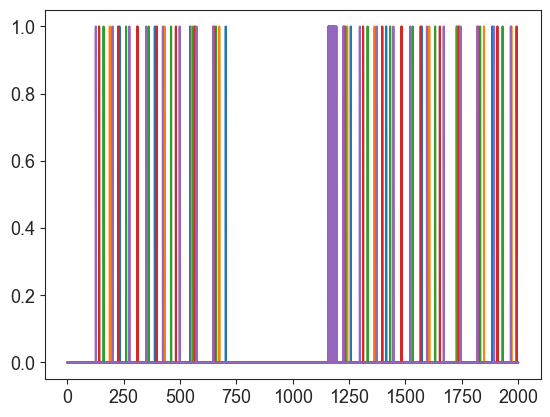

In [56]:
# spike_trains= [spike_train_1, spike_train_2, spike_train_3, spike_train_4, spike_train_5, spike_train_1n, spike_train_2n, spike_train_3n, spike_train_4n, spike_train_5n]

plt.plot(T, spike_train_1)
plt.plot(T, spike_train_2)
plt.plot(T, spike_train_3)
plt.plot(T, spike_train_4)
plt.plot(T, spike_train_5)

spike_trains={'1': spike_train_1, '2': spike_train_2, '3': spike_train_3, '4':spike_train_4, '5': spike_train_5}
data= pd.DataFrame(spike_trains, columns= ['1', '2', '3', '4', '5'])
print(data)

# Total_syn_activity= {'two cell':I_tot_synaptic, 'three cell': I_tot_synaptic3 }


# data= pd.DataFrame(Total_syn_activity, columns= ['two cell', 'three cell']) 
# spike_trains= np.append(spike_trains, spike_train_1)
# spike_trains= np.append(spike_train_2, spike_train_3)
# spike_trains= np.append(spike_train_4, spike_train_5)

print(np.size(spike_trains))

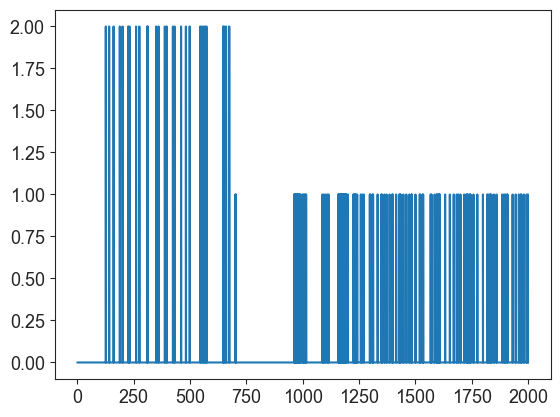

In [57]:
allspks = (spike_train_1+ spike_train_2 + spike_train_3 + spike_train_4 + spike_train_5 +  spike_train_1n + spike_train_2n + spike_train_3n + spike_train_4n + spike_train_5n)
plt.plot(T,allspks)

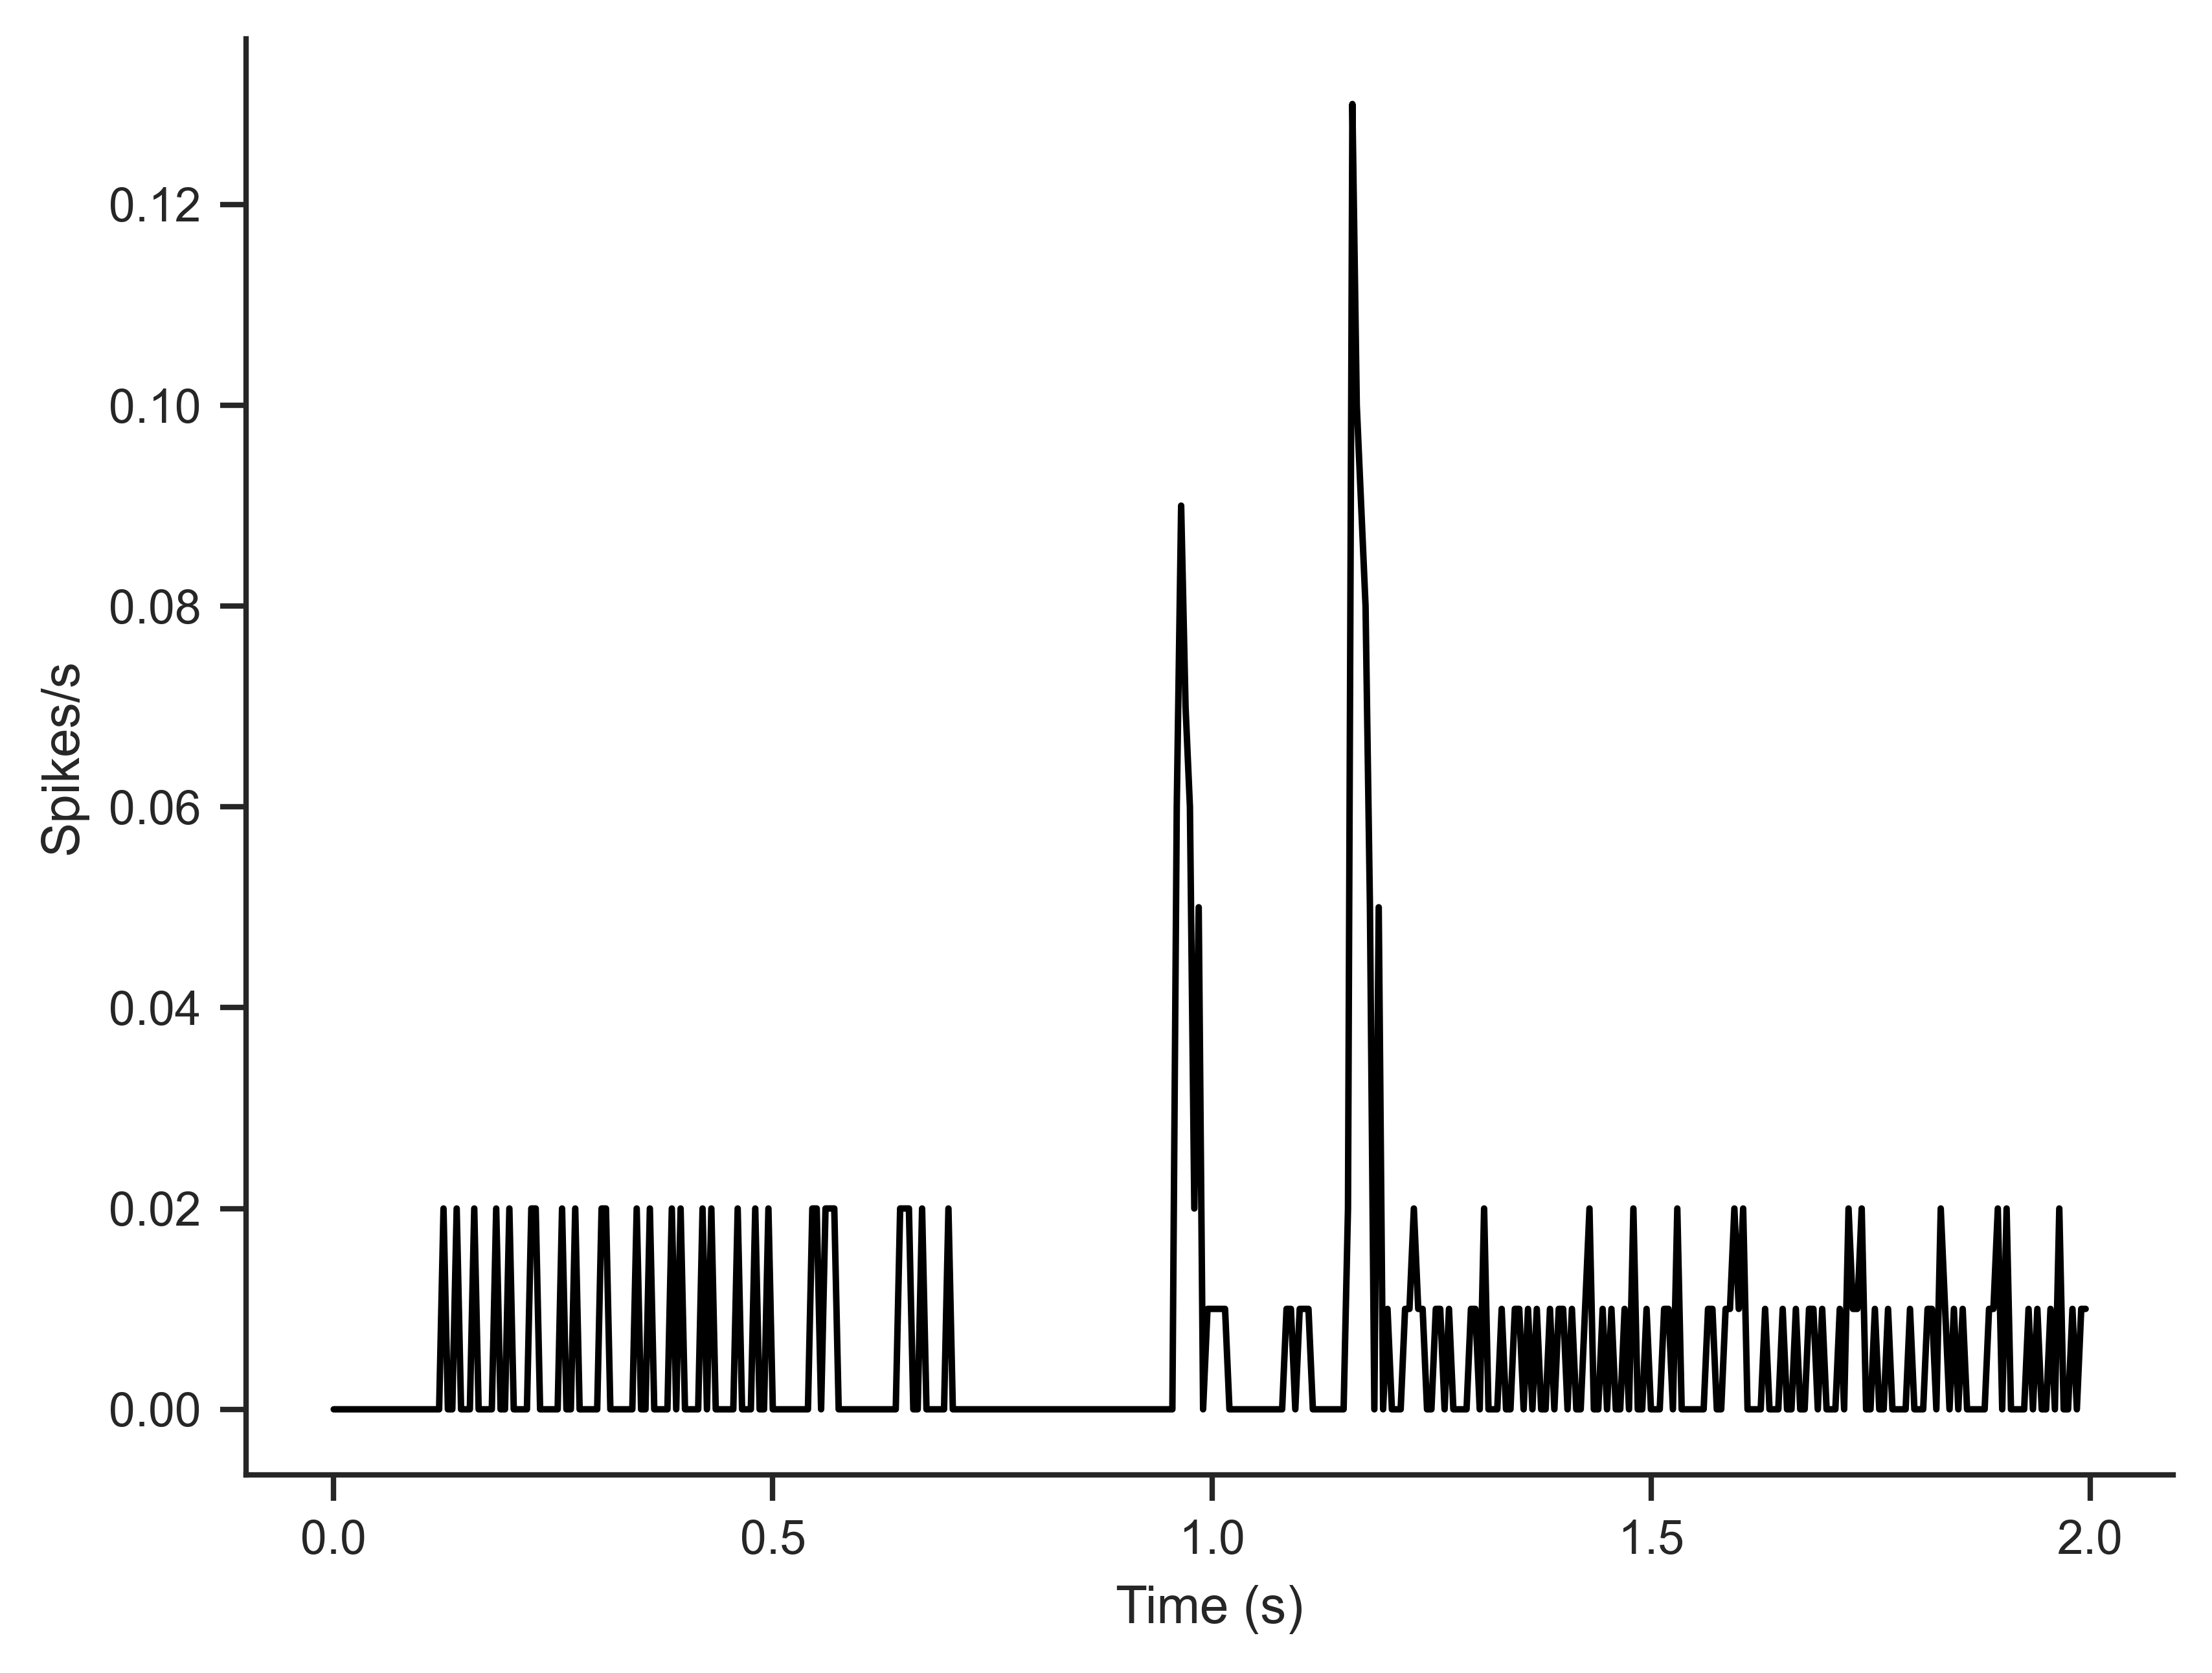

In [58]:
from turtle import color


k=0
x = np.zeros((10,400))
time_arr=[]
for i in range(400):
    time_arr = np.append(time_arr,k)
    x[0,i] = np.count_nonzero(spike_train_1[k:k+499])
    x[1,i] = np.count_nonzero(spike_train_2[k:k+499])
    x[2,i] = np.count_nonzero(spike_train_3[k:k+499])
    x[3,i] = np.count_nonzero(spike_train_4[k:k+499])
    x[4,i] = np.count_nonzero(spike_train_5[k:k+499])
    x[5,i] = np.count_nonzero(spike_train_1n[k:k+499])
    x[6,i] = np.count_nonzero(spike_train_2n[k:k+499])
    x[7,i] = np.count_nonzero(spike_train_3n[k:k+499])
    x[8,i] = np.count_nonzero(spike_train_4n[k:k+499])
    x[9,i] = np.count_nonzero(spike_train_5n[k:k+499])
    k=k+500    
# time_spikes = np.linspace(-100,100,40)    
time_spikes = (time_arr * 0.01)/1000
mean_spike = np.mean(x,axis=0)
# print(mean_spike/50)

my_pal = ['000000', '29AF8C', '97BE49', '3D9CCC', '7C60C6', 'D58C2E', 'C9492C', '44546A']
my_pal = [f"#{c}" for c in my_pal]

sns.reset_defaults() # useful when adjusting style a lot
sns.set(context="paper", style="ticks",
              # palette="Set2",
              palette=my_pal,
              rc={
              "pdf.fonttype": 42,  # embed font in output
              "svg.fonttype": "none",  # embed font in output
              "figure.facecolor": "white",
              "figure.dpi": 600,
              "axes.facecolor": "None", ## For transparency
              "axes.spines.left": True, 
              "axes.spines.bottom": True,
              "axes.spines.right": False,
              "axes.spines.top": False,
              
          }
          )
plt.plot(time_spikes,mean_spike/10, color='black')
# plt.hist(mean_spike/50)
plt.xlabel('Time (s)')
plt.ylabel('Spikes/s')
plt.xticks([0 , 0.5, 1, 1.5, 2])
# plt.yticks([0])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
# plt.savefig('tonic to bursts hist.pdf')
